# Convolutional Neural Networks (CNN)

## Intro

### Basics of Digital Images

* Every image that's stored on a digital device is made up of a matrix or array of numbers. Each element (or cell) of this matrix that stores a numerical value is called a pixel.

* If the dimensions of an image are 1920-by-1080, that means the width of the image is 1920 pixels, the height of the image is 1080 pixels, and the image has a total of 1920*1080 = 2073600 pixels in it. The digital device stores those corresponding numerical values that make up the image.

image.png

* In the greyscale image (middle), the pixels store values ranging from 0 to 255, where 0 represents the color black, and 255 represents the color white. Everything in between is a shade of grey.

* In the black-and-white image (right), each pixel either stores a 0 or a 1. Such images are also called binary images.

### Importing Dataset

* The beans dataset contains images of bean plants sorted into three categories — two for diseased and one for healthy plants (dataset source).

* The goal is to create a classifier that can predict, with reasonable accuracy, whether an image of a bean plant shows signs of disease or if it appears healthy.

image.png

* For each set of test, train, and validation images, we have three subfolders corresponding to the classes in our dataset:

 * angular_leaf_spot
 * bean_rust
 * healthy

* Each of those folders contains images from the dataset. This particular directory structure pairs well with Keras' `image_dataset_from_directory()` function.

* We can load in the dataset using that function, and it will return a `tensorflow.data.Dataset` object that will store a batch of images and their corresponding labels as a tuple.

In [ ]:
# importing the tar.gz. file directly into colab
!wget https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/beans_dataset.tar.gz

--2024-08-04 06:01:57--  https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/beans_dataset.tar.gz
Resolving dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)... 54.231.165.153, 54.231.201.97, 52.217.162.241, ...
Connecting to dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)|54.231.165.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 179790562 (171M) [application/x-gzip]
Saving to: ‘beans_dataset.tar.gz’

beans_dataset.tar.g 100%[===================>] 171.46M  13.2MB/s    in 27s     

2024-08-04 06:02:25 (6.46 MB/s) - ‘beans_dataset.tar.gz’ saved [179790562/179790562]



In [ ]:
# To uncompress the data

import tarfile

def extract_tar_gz(file_path, output_path):
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path=output_path)

# Use it like this:
# extract_tar_gz('/path/to/yourfile.tar.gz', '/path/to/output/directory')
extract_tar_gz('/content/beans_dataset.tar.gz', '/content/')

In [ ]:
import tensorflow as tf

train_set = tf.keras.utils.image_dataset_from_directory(
        directory='/content/beans/train',   # path to training folder of dataset
        labels='inferred',
        label_mode='categorical',
        batch_size=128,
        image_size=(500, 500),
        shuffle=False)

validation_set = tf.keras.utils.image_dataset_from_directory(
        directory='/content/beans/validation',     # path to validation folder of dataset
        labels='inferred',
        label_mode='categorical',
        batch_size=128,
        image_size=(500, 500),
        shuffle=False)

Found 1034 files belonging to 3 classes.
Found 133 files belonging to 3 classes.


* It will load in the dataset stored in the specified directory.
* The labels will automatically be generated based on the the directory structure.
* The labels will be encoded as `categorical`; can also do as `int`
* train_set will store images and labels in batches of size 128.
* The size of each image will be (500, 500).
* The data won't be shuffled.

### Exploring Dataset

* The training data has 1034 files belonging to 3 classes, and the validation data has 133 files belonging to 3 classes.

* TensorFlow stores this data in a `Dataset` object that has its own set of methods. One of those methods, `take()`, allows us to extract an element from the Dataset object.

* For instance, the following code will extract 1 element from train_set and store it as another `Dataset` object, `train_set_elem`:

In [ ]:
train_set_elem = train_set.take(1)
validation_set_elem = validation_set.take(1)

In [ ]:
type(train_set_elem)

tensorflow.python.data.ops.take_op._TakeDataset

A `Dataset` object stores the images and their labels as a tuple of Tensors. We can iterate over this tuple to get some information about our dataset.

In [ ]:
# iterating through the whole validation set prints the labels of each of its 133 items
# calling them in sets of 128 as specified while calling from directory (133=128+5)
# each label is a tensor of shape 3 since its one-hot encoded; if given 'int' while calling labels in directory would be a tendor of size 1
for images, labels in validation_set:
    print(labels)

tf.Tensor(
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 

In [ ]:
# iterating through the validation set take(1) prints the labels of 128 items (1 set of 128)
for images, labels in validation_set_elem:
    print(labels)

tf.Tensor(
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 

In [ ]:
for images, labels in train_set_elem:
    labels_shape = labels.shape
    images_shape = images.shape

In [ ]:
print(labels_shape)
print(images_shape)

(128, 3)
(128, 500, 500, 3)


* The labels had the shape (128, 3) and our images had the shape (128, 500, 500, 3). The 128 is the batch size we selected when we loaded in our data. That means a single element from our train_set has 128 images and their corresponding labels.

* When we loaded in the data, we encoded the labels as 'categorical' vectors. As a result, all of our labels are one-hot encoded. In label Tensors, a 1 indicates that the image belongs to a particular class. To know which class the 1 represents, we can get the list of the class names in the order they appear in label Tensors by accessing the `class_names` attribute of the dataset:

In [ ]:
train_set.class_names

['angular_leaf_spot', 'bean_rust', 'healthy']

Therefore:

* The `[1. 0. 0.]` label indicates the corresponding image belongs to the angular_leaf_spot class.
* The `[0. 1. 0.]` label indicates the corresponding image belongs to the bean_rust class.
* The `[0. 0. 1.]` label indicates the corresponding image belongs to the healthy class.

* Turning our attention to the shape of the images tensor on the previous screen, we saw that each image in our batch of 128 images has the shape (500, 500, 3).

* **500,500 represents the width and height of each image in pixels and the last value '3' represents the channels of image.**

**Color Channels**

* A colored image is the sum of three different colors — red (R), green (G), and blue (B). An RGB image is stored as a multi-dimensional matrix in which each dimension contains pixels with numerical values corresponding to the color's intensity, ranging from 0 to 255.

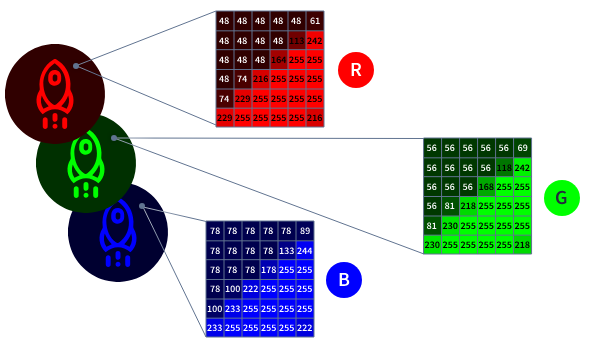

* For comparison, a binary or grayscale image would only have a single channel. The pixels in that channel store values corresponding to the intensity or brightness of the image at each specific point (pixel). For grayscale images, the channel has values representing shades of gray. For binary images, the channel has values representing just two colors — black and white.

* Since our images are stored in Tensors in batches of 128, we can convert them all to NumPy arrays and use `matplotlib.pyplot.imshow()` to display any one of those images. While we can directly pass a Tensor to `imshow()` and have it implicitly convert it to a NumPy array for us, it's still good practice to explicitly convert Tensors to NumPy arrays when working with non-TensorFlow libraries to ensure compatibility and avoid potential issues.

* Although our images store pixel values from 0 to 255, the values are stored as floats and not as integers. When the array contains floats, matplotlib expects those values to be in the range of [0, 1]. A straightforward way to ensure we use the expected range is to simply divide the image array by 255, i.e, the pixels are such that 212.0 (float) instead of 212 (int) - and matplotlib expects float values between 0 to 1. **Hence dividing by 255 to normalize pixel values between 0 to 1**

In [ ]:
import matplotlib.pyplot as plt

for image, label in train_set.take(1):
  images = image

In [ ]:
type(images)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
import numpy as np

images = np.array(images) # converting tensor to numpy array

In [ ]:
type(images)

numpy.ndarray

In [ ]:
images[0].shape

(500, 500, 3)

In [ ]:
images[0][0][0]

array([54., 39.,  0.], dtype=float32)

In [ ]:
(images[0]/255)[0][0]

array([0.21176471, 0.15294118, 0.        ], dtype=float32)

In [ ]:
# normalizing the images
images = images/255

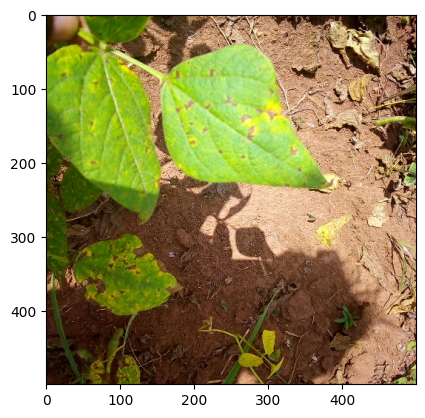

In [ ]:
plt.imshow(images[0])
plt.show()

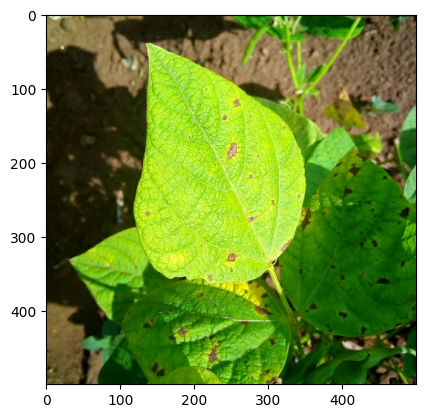

In [ ]:
plt.imshow(images[100])
plt.show()

### Convolutions

* After exploring our dataset, it's clear it contains a variety of images. Sometimes there are multiple leaves in a single image and sometimes not. The leaves aren't always in the center of the image either. At times, the leaf might be inverted or slightly rotated compared to another. Since the images were taken using a smartphone camera during different times of the day, there are also significant variations in lighting within the images.

* All of this variety makes it difficult for our model to learn the different relevant features of those leaves and accurately identify them in any given image.

* For example, if our model wanted to learn how to recognize the Dataquest logo, it would have to learn different features or patterns of the logo. These features could be:

 * **Shape**: The model would need to learn the specific shapes that makes up the logo, such as circles, rectangles, or any other geometric forms that are part of the design.
 * **Colors**: The model would need to recognize the unique colors used in the Dataquest logo, including the specific shades, and how they are distributed throughout the design.
 * **Spatial relationships**: The model would need to understand the relative positioning and arrangement of the different elements within the logo. This includes the relative size and orientation of the shapes and the text present in the logo.

* However, if the logo were rotated, then the location of those edges and the color intensities would change as well. **Our model should be able to learn those patterns in relation to one another instead of focusing on one pixel at a time. This is what convolutions help us accomplish.**

* A convolution is a mathematical operation in which we take the element-wise product of a neighborhood of pixels in an image with a small matrix of numbers, called a kernel or a filter, then sum the result. We then slide the kernel across the image, left to right, top to bottom, and repeat the operation.

image.png

#### Hard Code & Convoluted Image

##### General Convolutions

In [ ]:
import numpy as np

image = np.array([[1, 1, 0, 0, 0, 0, 1, 1],
                  [1, 0, 1, 1, 1, 1, 0, 1],
                  [1, 0, 1, 1, 1, 1, 0, 1],
                  [1, 0, 0, 0, 0, 0, 0, 1],
                  [1, 0, 0, 0, 0, 0, 0, 1],
                  [1, 0, 1, 1, 1, 1, 0, 1],
                  [1, 0, 1, 1, 1, 1, 0, 1],
                  [1, 1, 0, 0, 0, 0, 1, 1]])

kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

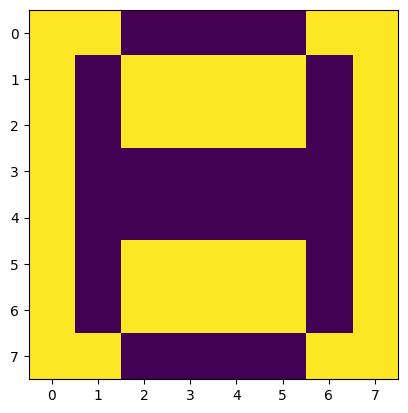

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
image.shape

(8, 8)

In [ ]:
conv_output = np.zeros((image.shape[0]-2,image.shape[0]-2))
conv_output

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
conv_output[0][0]

0.0

In [ ]:
for i in range(0, image.shape[0]-2):
  for j in range(0, image.shape[1]-2):
    part_image = np.array([[image[i][j], image[i][j+1], image[i][j+2]],
                           [image[i+1][j], image[i+1][j+1], image[i+1][j+2]],
                           [image[i+2][j], image[i+2][j+1], image[i+2][j+2]]])
    conv_output[i][j] = np.sum(np.multiply(part_image, kernel))

In [ ]:
conv_output

array([[-1.,  2.,  0.,  0., -2.,  1.],
       [-1.,  3.,  0.,  0., -3.,  1.],
       [-3.,  1.,  0.,  0., -1.,  3.],
       [-3.,  1.,  0.,  0., -1.,  3.],
       [-1.,  3.,  0.,  0., -3.,  1.],
       [-1.,  2.,  0.,  0., -2.,  1.]])

In [ ]:
plt.imshow(conv_output)
plt.show()

##### With the leaf image

In [ ]:
# repeating above for an image

for image, label in train_set.take(1):
  images = image

images = np.array(images)

image = images[0]

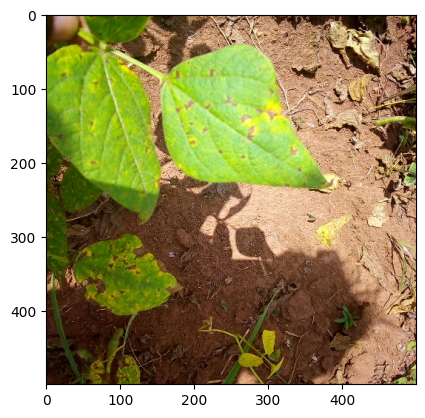

In [ ]:
# original image without convolution
plt.imshow(image/255)
plt.show()

In [ ]:
conv_output = np.zeros((image.shape[0]-2,image.shape[0]-2))
conv_output.shape

(498, 498)

In [ ]:
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

In [ ]:
for i in range(0, image.shape[0]-2):
  for j in range(0, image.shape[1]-2):
    part_image = np.array([[image[i][j], image[i][j+1], image[i][j+2]],
                           [image[i+1][j], image[i+1][j+1], image[i+1][j+2]],
                           [image[i+2][j], image[i+2][j+1], image[i+2][j+2]]])
    conv_output[i][j] = np.sum(np.multiply(part_image, kernel))

In [ ]:
# image after convolution with above mentioned kernel
plt.imshow(conv_output/255)
plt.show()

#### CNN

##### Convolutional Layer

* A **convolutional neural network (CNN)** consists of one or more convolutional layers. Each convolutional layer carries out a convolution operation like the one we saw on the previous screen. An activation function, like ReLU, is applied to the output of a convolutional layer to give us a feature or activation map. That's the feature representation or pattern that our model tries to learn from the input.

* We can see a pattern in the output from the previous code:

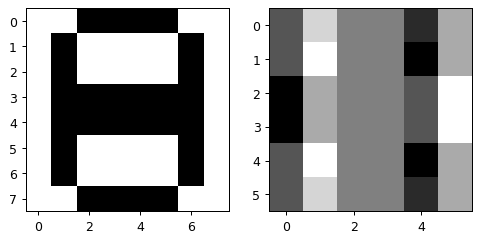

* The output image on the right consists of vertical edges. The kernel we used, when convolved with our image, outputted an image that shows only the vertical edges from that input. The convolution operation with that specific kernel allowed us to extract a particular feature from the image — a vertical edge. We can transpose that kernel to get a different kernel with the following values:

`[-1, -2, -1], [0, 0, 0], [1, 2, 1]`

* The above kernel, when convolved with the input image, would extract horizontal edges:

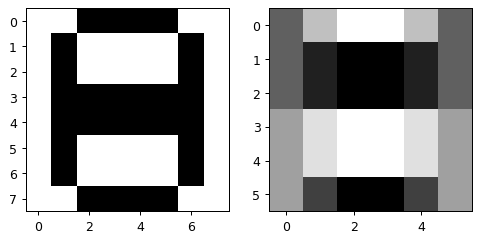





* The kernel (or filter) is the weight matrix we apply across the entire input. Unlike the NNs we learned about previously, in CNNs we don't have one weight for every input. A kernel is re-used or shared across the entire image.

* A convolutional layer can have multiple kernels stacked on top of each other. **As the model trains, the backpropagation step updates the weights in each kernel, allowing the model to learn or extract different features from the input.** If we want our model to extract horizontal edges, we don't have to manually set the kernel values to the ones we can see in the kernel above. The **model learns those values (weights) all on its own.**

* For the leaves in our beans dataset, as the model trains and updates its kernels, it learns different features like the tip of a leaf, its base, the stem, veins, etc. It also learns features that differentiate a diseased leaf from a healthy one.

* These kernels present us with multiple advantages:

 * They reduce the number of parameters our model tries to learn.
 * The patterns they learn are **translation-invariant**. Since we slide or translate the kernels across the image, they can learn patterns independent of where they are in the image.

* Previously, we saw a single kernel applied to an image with just one channel. The process is no different when the input is an RGB image and we have multiple kernels in our convolutional layer. Since our input has three channels, the kernel will also have three channels, each corresponding to one of the input channels. **During the convolution operation, the kernel is applied independently to each channel of the input, and the results are summed across channels to produce a single output value for each spatial position in the output feature map**. This process effectively combines information from all three input channels and helps the CNN learn features that consider the relationships between channels. Ex: In previous codes each output had 3x3 output, with RGB we have 3 3x3 output corresponding to each channel which is element-wise added to produce 1 final 3x3 output.

* For example, in the case of an RGB color image with three channels, the kernel will have three channels, with each channel in the kernel having its own set of weights. These weights are learned during the training process to capture the relevant features in each channel of the input image. If we had an image of shape 8x8x3, we could use a kernel of size 3x3x3. The width and height of the kernel (3x3) can be different than the input (8x8), but the number of channels should match (3). The number of channels in the filter (or kernel) is determined automatically based on the number of channels in the input image (or the output of the previous layer). We do not explicitly set the number of channels in the filter; it is handled automatically for us.

* When defining a convolutional layer, we generally specify the number of filters and their spatial dimensions. The number of channels in each filter will match the number of channels in the input image (or the output of the previous layer) to ensure the convolution operation is performed correctly. For example, if we have four kernels, the output of the convolutional layer would look like the following:

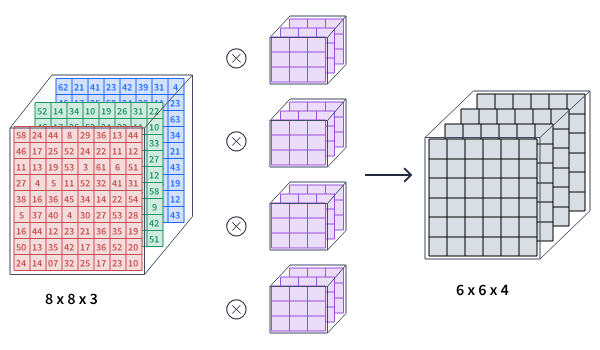

The output of the layer has four channels, also referred to as the **width** of the layer. There will be four feature maps obtained from the convolutional layer of size 6x6.

Implementing below a Convolutional layer using `tensorflow.keras.layers.Conv2D`:

* `filters`: The depth of the output of the convolution layer. In the previous screen's example, this value was 4.
* `kernel_size`: A tuple of the width and height of our kernels in that layer. In the previous example, this value was 3x3.
* `activation`: The activation function we want to use.
* `input_shape`: As is the case with Dense layers, the first layer of our CNN-based model also requires this argument.

In [ ]:
from tensorflow.keras import layers, Sequential

model = Sequential()

In [ ]:
model.add(layers.Conv2D(kernel_size=(3,3), filters=3, padding='same', strides=2, input_shape=(500,500,3)))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 250, 250, 3)         │              84 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84 (336.00 B)

 Trainable params: 84 (336.00 B)

 Non-trainable params: 0 (0.00 B)

##### Padding and Strides

* The reason for output dimension being `(250, 250, 3)` is related to the two parameters we used to define our convolutional layer — padding and strides.

* **Striding** refers to how many pixels we move at a time during convolution; 2 in case previous case leading to halving of image shape

**Padding**

* As the kernel moved around the input pixels, the value at the center of the kernel didn't move across all the pixels of the input. We can conclude that none of the kernel values moved across all the pixels. Our convolutional operation was losing out on information as a result. Even when the stride was 1, the kernel didn't capture all the pixels of the input. As a result, our output dimension shrunk: it went from 8x8 to 6x6.

* If we'd inserted extra rows and columns (comprised entirely of 0s) to the top/bottom and left/right of the input, the kernel could've taken more pixels into account. That would've allowed it to extract more information from the input.

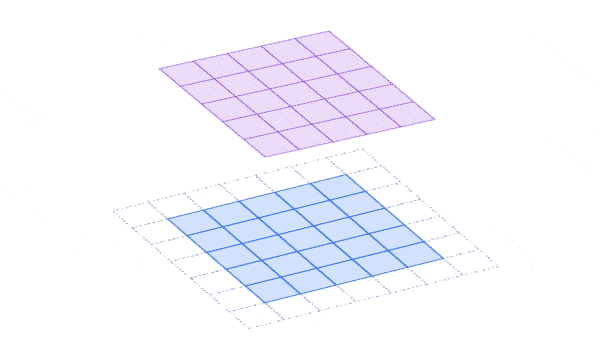

This process of adding extra rows and columns comprised of 0s is referred to as padding the input. For a Conv2D layer, we have two options related to this:

* `valid`: No padding is applied to the input.
* `same`: The input is padded with zeros.

We can see the result of setting the padding to same in the animation above. The output of the convolution can have similar dimensions to the input.

In [ ]:
model = Sequential()
# 6 filters of size (5, 5)
# No padding
# Stride of 4
# input shape of (500, 500, 3)
model.add(layers.Conv2D(kernel_size=(5,5), filters=6, padding='valid', strides=4, input_shape=(500,500,3)))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 124, 124, 6)         │             456 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 456 (1.78 KB)

 Trainable params: 456 (1.78 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(layers.Conv2D(kernel_size=(3,3), filters=3, padding='valid', strides=1, input_shape=(500,500,3)))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 498, 498, 3)         │              84 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84 (336.00 B)

 Trainable params: 84 (336.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(layers.Conv2D(kernel_size=(3,3), filters=3, padding='same', strides=1, input_shape=(500,500,3)))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 500, 500, 3)         │              84 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84 (336.00 B)

 Trainable params: 84 (336.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(layers.Conv2D(kernel_size=(3,3), filters=3, padding='valid', strides=2, input_shape=(500,500,3)))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 249, 249, 3)         │              84 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84 (336.00 B)

 Trainable params: 84 (336.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(layers.Conv2D(kernel_size=(3,3), filters=3, padding='same', strides=2, input_shape=(500,500,3)))
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 250, 250, 3)         │              84 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84 (336.00 B)

 Trainable params: 84 (336.00 B)

 Non-trainable params: 0 (0.00 B)

**Note the output shape of image when using `stride=2` reduces by half and when no padding width is fewer by 1 compared to when 0 padded (for `kernel_size=3`)**

##### Max Pooling and Fully-Connected Layers

* Increasing the number of strides results in smaller output dimensions and, therefore, fewer parameters to train in the subsequent layers. Another way to reduce the number of model parameters is to downsample the output through an operation called **pooling**.

* The process for a classification model is to flatten the output from the max pooling operation and feed it into a fully-connected layer. The fully-connected layer carries out the classification part using the features extracted from the convolution part.

* The final layer will have to output a value corresponding to each class in our dataset. These values, based on the loss function we use, will give us the probability of the image belonging to each class.

In [ ]:
model = Sequential()
model.add(layers.Conv2D(kernel_size=(3,3), filters=3, input_shape=(500,500,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(3))
model.summary()

* Trying to train large models on large images can often result in Out of Memory (OOM) errors because the hardware might not necessarily be able to store a large model and process the images at the same time.

##### Train & Eval

* Our dataset has three classes, and our input labels are already one-hot encoded. We'll use the **Categorical Crossentropy Loss Function** for our model.

* The Crossentropy loss function is similar to the log loss function used for Logistic Regression. It can be used for both binary and multi-class classification.

* The better our model performs, the lower its loss will be. The worse our model performs, the higher the loss will be. Therefore, crossentropy loss function is a great option for a classification model. For multi-class classification, the loss function works in the same way for each class. We calculate the loss value for each label separately for every training iteration, then sum them.

In [ ]:
opt = keras.optimizers.Adam()
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [ ]:
model.fit(train_set.get(1), epochs=1)

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
        directory='/content/beans/test',   # path to test folder of dataset
        labels='inferred',
        label_mode='categorical',
        batch_size=128,
        image_size=(500, 500),
        shuffle=False)

In [ ]:
test_loss, test_acc = model.evaluate(test_set.get(1))
print(f"Test set accuracy: {test_acc}")

Our model is not performing too well — ignoring how it may have done on the training data, it's only able to correctly classify unseen images ~33% of the time. While that's about the same as randomly guessing, this result is to be expected.
* First of all, we didn’t normalize our inputs, which impacts CNNs just as much as other models.
* Secondly, our model was a very simple one. The true power of deep learning models lies in their depth and complexity. A single convolutional layer and a fully-connected layer won't have much predictive power.

## CNN Architecture

### Importing Dataset

In [ ]:
# importing the tar.gz. file directly into colab
!wget https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/beans_dataset.tar.gz

In [ ]:
# To uncompress the data

import tarfile

def extract_tar_gz(file_path, output_path):
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path=output_path)

# Use it like this:
# extract_tar_gz('/path/to/yourfile.tar.gz', '/path/to/output/directory')
extract_tar_gz('/content/beans_dataset.tar.gz', '/content/')

In [ ]:
import tensorflow as tf

train_set = tf.keras.utils.image_dataset_from_directory(
        directory='/content/beans/train',   # path to training folder of dataset
        labels='inferred',
        label_mode='categorical',
        batch_size=32,
        image_size=(227, 227),              # using 227 since its the default input size for AlexNet which we use for modeling
        shuffle=False)

validation_set = tf.keras.utils.image_dataset_from_directory(
        directory='/content/beans/validation',     # path to validation folder of dataset
        labels='inferred',
        label_mode='categorical',
        batch_size=32,
        image_size=(227, 227),
        shuffle=False)

test_set = tf.keras.utils.image_dataset_from_directory(
        directory='/content/beans/test',   # path to test folder of dataset
        labels='inferred',
        label_mode='categorical',
        batch_size=32,
        image_size=(227, 227),
        shuffle=False)

 The "deepness" refers to the number of hidden layers, as well as the width of those layers. For convolutional layers, the width of a layer is determined by the number of filters in that layer. Adding more convolutional layers with larger widths would, theoretically, allow our model to extract and learn more features from our input data.

This is also the basis of AlexNet, which has an 8-layer CNN:

* 5 convolutional layers.
* 2 fully-connected hidden layers.
* 1 output layer.

### Normalization

* When working with a dataset with multiple features, different features could have different ranges of values. One feature could unduly impact the model's pefomance more than another.

* We **standardize or normalize our input features** so all of them can be on the same scale and thereby **reduce any potential bias** the model might end up having towards any one feature. Additionally, training over a set of features with a smaller range of values also speeds up the training.

* While exploring the beans dataset in the previous sections, we saw how different images had different lighting conditions. We want our model to be able to classify our leaves accurately, whatever the lighting. Normalizing the images could make our model more resilient to such variations across the dataset.

* There are several different options for preprocessing the images. For example, we could try:

 * **Centering**: Calculate the mean value across the training set and subtract that value from each pixel across every image.
 * **Normalization**: Scale the pixel values to a range like [0, 1] or [-1, 1]. This is also referred to as rescaling the input.
 * **Standization**: Subtract the mean of the training set from each pixel across every image and divide the result by the standard deviation of the training set.

* TensorFlow, however, refers to those terms differently:
 * Normalization is referred to as rescaling.
 * Standardization is referred to as normalization.

In TensorFlow our data is stored in a Dataset object as a tuple of Tensors storing the images and labels. We only need to normalize our images, not their labels. We can use the map() method to extract the images from our dataset:

In [ ]:
train_imgs = train_set.map(lambda imgs, labels: imgs)

`train_imgs` will store only the images from the training set. We can then normalize these images. We first instantiate a `Normalization` layer:

In [ ]:
normalization_layer = tf.keras.layers.Normalization(axis=-1)

Setting the axis to -1 will result in the layer calculating a mean and variance for each index on the last axis. The images are stored in Tensors of shape `[32, 500, 500, 3]`. The last axis, therefore, corresponds to the RGB channels. Using the `adapt()` method, the normalization layer will calculate the mean and variance values for each channel:

In [ ]:
normalization_layer.adapt(train_imgs)

The above step only uses `train_imgs` to calculate the mean and variance values. It doesn't normalize those images. Once those values are calculated, we have the normalization layer use those values to normalize the images in our training set. Since we'll need the corresponding labels for our normalized training images, we pass the labels through a lambda function without changing their values:

In [ ]:
train_set_normalized = train_set.map(lambda imgs, labels: (normalization_layer(imgs), labels))

* We also have to normalize our validation and test sets. If we were to take some new pictures of the leaves and input them into our model for predicting whether they are diseased, the model would likely fail because it was trained on normalized images. The model would expect input similar to the training data. That's why we need to normalize the other two datasets.

* When normalizing the validation and test sets, we should **use the mean and variance values obtained from the training set**. We want our model to generalize and perform well on unseen data. We use validation and test sets in lieu of unseen data to allow us to train such a model.

* If we were to calulate the mean and variance of the validation and test sets separately and use those values to normalize the datasets, we would be "leaking" information about the two datasets back to our model. When information from our test or validation set is unintentionally used during the training process like this, we refer to it as data leakage.

* Data leakage can end up introducing bias in our model. The model might end up performing well on the validation and test sets; however, we might not get a similar performance when we use the model to classify any new, unseen data.

* This would be even more of a problem if we used the model to classify a single input. We won't be able to calculate the mean and variance of a single image in order to normalize it. If we couldn't normalize that single image input, our model would likely not output an accurate prediction.

* This is why we normalize our validation and test sets using the mean and variance values obtained from the training set. We'll use the same normalization layer to normalize the two other sets.

### AlexNet

AlexNet uses a different input_shape (227, 227) than what we've been using for the beans dataset (500, 500).

image.png

* The first layer is a convolutional layer with a filter of size 11x11. At this stage, it's reasonable to ask what the appropriate kernel size is for a given convolutional layer. The answer is that it's a hyperparameter we can tune.

* The 11x11 kernel size was selected by the creators of AlexNet to capture more of the objects in the images. Since the creation of AlexNet, both research and experiments have shown that deeper models (ones with more convolutional layers) are better than wider models (ones with larger kernels). Many CNN architectures since then have used kernels of sizes 5x5, 3x3 etc. More layers allow the model to extract more features from previous layers. Smaller kernels also result in fewer model parameters. This topic is still being researched, though. Newer research indicates that larger filters are a viable option. That's the pattern we'll notice across these lessons — designing deep learning architectures is very experimental.

* We also need to consider that our beans dataset only has images of leaves. Even with large image sizes, we don't necessarily require large filter sizes and can opt for smaller ones if we want to.

* AlexNet applied padding to inputs of all convolutional layers except the first one. We might recall that we can set padding in Conv2D layers as same or as valid. AlexNet set padding to valid for the first convolutional layer and same for the rest. In the figure above, we can see how the padding and number of strides have an impact on outputs of each layer.

* After the first convolutional layer, the architecture used a max pooling layer with a stride of 2. Based on the experiments the authors ran, this choice was shown to improve the model's performance. As a final note, all the layers in the model use the ReLU activation function.

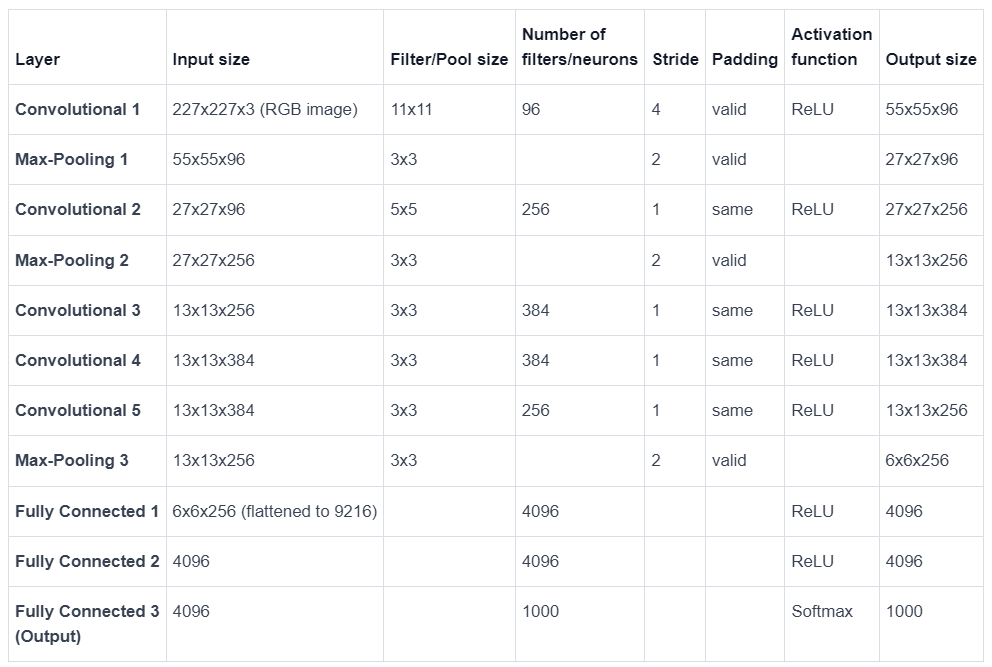

In [ ]:
from tensorflow.keras import Sequential, layers

model = Sequential()
model.add(layers.Conv2D(kernel_size=(11,11), filters=96, strides=4, padding='valid', activation='relu', input_shape=(500,500,3)))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))
model.add(layers.Conv2D(kernel_size=(5,5), filters=256, strides=1, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 123, 123, 96)        │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 61, 61, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 61, 61, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 256)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 649,600 (2.48 MB)

 Trainable params: 649,600 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

For AlexNet, the output layer had a size of 1000 because it had 1000 different classes of images. We only have 3 classes in our dataset, so our output layer only needs a size of 3.

In [ ]:
from tensorflow.keras import Sequential, layers

model = Sequential()
model.add(layers.Conv2D(kernel_size=(11,11), filters=96, strides=4, padding='valid', activation='relu',
                       input_shape=(500,500,3)))                                                          # conv layer 1
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))                                # maxpool layer 1
model.add(layers.Conv2D(kernel_size=(5,5), filters=256, strides=1, padding='same', activation='relu'))     # conv layer 2
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))                                # maxpool layer 2
model.add(layers.Conv2D(kernel_size=(3,3), filters=384, strides=1, padding='same', activation='relu'))     # conv layer 3
model.add(layers.Conv2D(kernel_size=(3,3), filters=384, strides=1, padding='same', activation='relu'))     # conv layer 4
model.add(layers.Conv2D(kernel_size=(3,3), filters=256, strides=1, padding='same', activation='relu'))     # conv layer 5
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))                                # maxpool layer 3
model.add(layers.Flatten())                                                                               # flattening for fc
model.add(layers.Dense(4096, activation='relu'))                                                          # fully connected layer 1
model.add(layers.Dense(4096, activation='relu'))                                                          # fully connected layer 2
model.add(layers.Dense(3, activation='softmax'))                                                          # # fully connected layer 3 (output layer)
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 123, 123, 96)        │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 61, 61, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 61, 61, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 30, 30, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 30, 30, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 30, 30, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4096)                │     205,524,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │          12,291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 226,065,795 (862.37 MB)

 Trainable params: 226,065,795 (862.37 MB)

 Non-trainable params: 0 (0.00 B)

Using input shape of AlexNet - `(227, 227, 3)`

In [ ]:
from tensorflow.keras import Sequential, layers

model = Sequential()
model.add(layers.Conv2D(kernel_size=(11,11), filters=96, strides=4, padding='valid', activation='relu',    # conv layer 1
                       input_shape=(227,227,3)))          # using input shape of AlexNet
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))                                # maxpool layer 1
model.add(layers.Conv2D(kernel_size=(5,5), filters=256, strides=1, padding='same', activation='relu'))     # conv layer 2
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))                                # maxpool layer 2
model.add(layers.Conv2D(kernel_size=(3,3), filters=384, strides=1, padding='same', activation='relu'))     # conv layer 3
model.add(layers.Conv2D(kernel_size=(3,3), filters=384, strides=1, padding='same', activation='relu'))     # conv layer 4
model.add(layers.Conv2D(kernel_size=(3,3), filters=256, strides=1, padding='same', activation='relu'))     # conv layer 5
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))                                # maxpool layer 3
model.add(layers.Flatten())                                                                               # flattening for fc
model.add(layers.Dense(4096, activation='relu'))                                                          # fully connected layer 1
model.add(layers.Dense(4096, activation='relu'))                                                          # fully connected layer 2
model.add(layers.Dense(3, activation='softmax'))                                                          # # fully connected layer 3 (output layer)
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)                   │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │          12,291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,293,635 (222.37 MB)

 Trainable params: 58,293,635 (222.37 MB)

 Non-trainable params: 0 (0.00 B)

### Weight Initialization

* The process of selecting the starting value to use for weights is referred to as weight initialization

* One obvious choice would be to initialize all weights to 0. Since all our weights will have the same starting value, after the weight update step of gradient descent, all the weights will get updated to the same value. Each neuron, as a result, will have the same output at every step.

* If we initialize all our weights with the same value, all the neurons in our model will learn the same features. This will limit our model's learning capabilities significantly.

* Initializing weights with really small or large values also poses a problem. During backpropagation, really **small weights** can result in really small gradients. As the number of layers increases, those gradients keep getting smaller. As a result, our model would learn really slowly. This is referred to as the **vanishing gradients** problem.

* Conversely, **large weights** can result in really large gradients. As the number of layers increases, those gradients would keep getting larger. Our model might not converge at all — or worse, it might start to diverge. This is referred to as the **exploding gradients** problem.

**Weight Initialization Techniques**

* The basis for them is randomly selecting values from certain distributions, like the normal or uniform distributions, with a specific mean and variance.

* In AlexNet, the authors initialized weights from a Gaussian distribution — also known as the normal distribution — with a mean of 0 and a standard deviation of 0.01.

* Here are some alternatives that are commonly used as well:
 * **Xavier or Glorot Initialization** is often preferred when using the sigmoid or tanh activation functions.

 * **He Initialization** is a good choice when using ReLU.

* Keras already has these initializers built-in. By default, the `Conv2D` and the `Dense` layers use the **Glorot Uniform initializer**.

In [ ]:
from tensorflow.keras import initializers

weight_initializer = initializers.RandomNormal(mean=0, stddev=0.01, seed=417)

In [ ]:
from tensorflow.keras import Sequential, layers

model = Sequential()
model.add(layers.Conv2D(kernel_size=(11,11), filters=96, strides=4, padding='valid', activation='relu',
                       input_shape=(227,227,3), kernel_initializer=weight_initializer))                   # conv layer 1
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))                                # maxpool layer 1
model.add(layers.Conv2D(kernel_size=(5,5), filters=256, strides=1, padding='same', activation='relu',
                        kernel_initializer=weight_initializer))                                           # conv layer 2
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))                                # maxpool layer 2
model.add(layers.Conv2D(kernel_size=(3,3), filters=384, strides=1, padding='same', activation='relu',
                        kernel_initializer=weight_initializer))                                           # conv layer 3
model.add(layers.Conv2D(kernel_size=(3,3), filters=384, strides=1, padding='same', activation='relu',
                        kernel_initializer=weight_initializer))                                           # conv layer 4
model.add(layers.Conv2D(kernel_size=(3,3), filters=256, strides=1, padding='same', activation='relu',
                        kernel_initializer=weight_initializer))                                           # conv layer 5
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))                                # maxpool layer 3
model.add(layers.Flatten())                                                                               # flattening for fc
model.add(layers.Dense(4096, activation='relu', kernel_initializer=weight_initializer))                   # fully connected layer 1
model.add(layers.Dense(4096, activation='relu', kernel_initializer=weight_initializer))                   # fully connected layer 2
model.add(layers.Dense(3, activation='softmax'))                                                          # fully connected layer 3 (output layer)
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)                   │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │          12,291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,293,635 (222.37 MB)

 Trainable params: 58,293,635 (222.37 MB)

 Non-trainable params: 0 (0.00 B)

### Training

* For optimizers, we might consider using the Adam optimizer. However, some research suggests that **for image classification tasks, Stochastic Gradient Descent (SGD) is probably a better option**, since the latter tends to generalizes better compared to Adam. That said, this is not a hard rule and we should always be open to experimentation. Some datasets, on some models, may perform better with Adam.

* We'll also evaluate our model on the validation dataset. We can pass the validation set to the `validation_data` parameter when we call `model.fit()` on the training set.

* When we fit a model in Keras, it returns a `History` Object. The object has a history attribute that **stores information related to the training for each epoch**, such as the training and validation accuracy. The information is stored in a dictionary, and we can access the keys and values in that dictionary. For example, if the object was called history, we could obtain the keys as follows:

 * **Code**: `history.history.keys()`
 * **Output**: `dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])`

In [ ]:
# AlexNet utilized the Stochastic Gradient Descent optimizer with learning rate = 0.01

opt = keras.optimizers.sgd(learning_rate=0.01)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(train_set.get(1), epochs=3, validation_data=validation_set.get(1))

In [ ]:
history.history.keys()

In [ ]:
import matplotlib.pyplot as plt

plt.plot()
plt.xlabel()
plt.ylabel()
plt.show()

### Hyperparameter Optimization

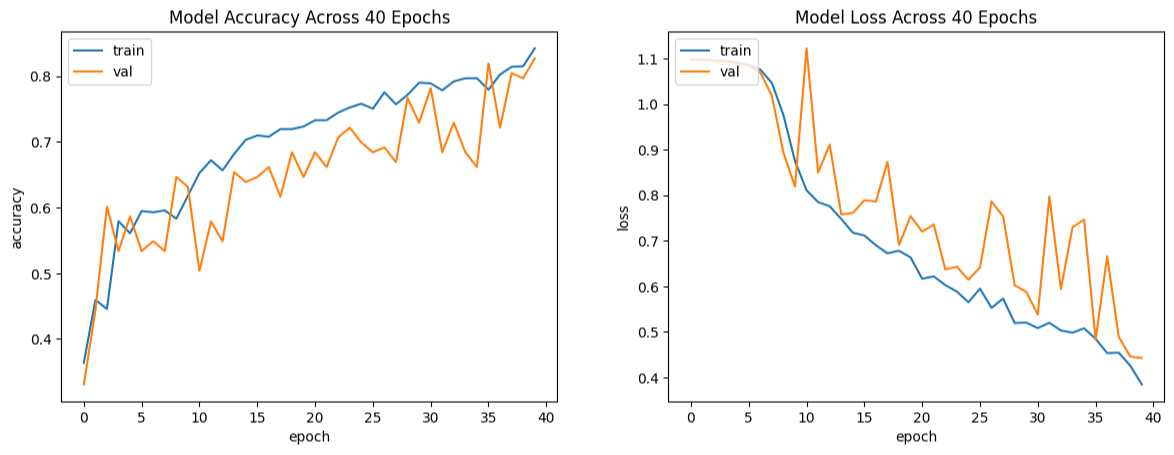

* We see that both our training and validation accuracies have an upward trajectory towards the end of the training, while the losses have a downward trajectory. In such a situation, it's reasonable to assume that our model is still learning, and we can let it train for more epochs. If those values plateau after a certain number of epochs, that means that our model isn't learning much from the data after that point.

* If both the **training and validation accuracies were low** or both the loss values were high, then it could have been a sign that the model was **underfitting**. In such situations, a **more complex architecture or tuning hyperparameters** could help us get better results.

* If the **validation accuracy is much lower than the training accuracy** or the validation loss is much higher than the training loss, we can say the model might be **overfitting**. If the validation accuracy starts to decrease over time or the validation loss starts to increase, that would be a definitive indication that the model is overfitting.

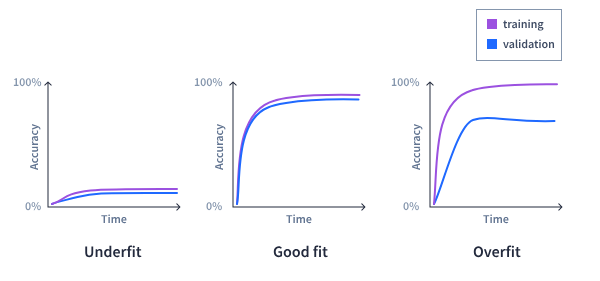

* To tackle overfitting, we could either try to explore some regularization options, or we could try to use more data to train our model. Reducing the model's complexity is also a viable option in these situations.

* We should also note the spikes in our curves. These spikes can occur for different reasons:

 * The learning rate might be too large. A high learning rate could cause the model to diverge in certain cases.
 * It could be a side-effect of training on batches of data. A different optimizer than SGD could be tried to combat this.
 * The training and validation datasets could be too small in relation to the network size. Increasing the size of the datasets or decreasing the size of the network could help.
* Certain images in our dataset could be contributing noise that impacts the model training. Exploring the data in more detail and identifying those images is an option; however, it's an impractical solution when working with large datasets.

* Because of these spikes in our curves, it's difficult to identify whether our model is overfitting.

* Some of the hyperparameters that can be tuned when designing a CNN:
 * Number of layers.
 * Width of the layers, that is, the number of filters/nodes.
 * Size of the filters.
 * Type of padding.
 * Number of strides.
 * Size of the pooling layer.
 * Optimizer and learning rate.
 * Number of epochs.
 * Batch size.

### Visualizing Feature Maps

* The initial layers of a CNN look at the input from a broader perspective or as a whole. The later layers start extracting specific details. The CNN eventually learns to associate those details (feature maps) to a particular class.

In [ ]:
conv_layers = [layer.name for layer in model.layers if "conv" in layer.name]
classes = ["angular_leaf_spot", "bean_rust", "healthy"]

In [ ]:
import numpy as np

train_set = tf.keras.utils.image_dataset_from_directory(
    directory='beans/train/',
    labels='inferred',
    batch_size=None,
    image_size=(227, 227),
    shuffle=False)

def extract_images(dataset, label_value):
    for img, label in dataset.filter(lambda img, label: label == label_value).take(1):
        extracted_image = np.expand_dims(img.numpy(), axis=0)
        return extracted_image

train_imgs = train_set.map(lambda imgs, labels: imgs)
normalization_layer = layers.Normalization(axis=-1)
normalization_layer.adapt(train_imgs)

train_set_normalized = train_set.map(lambda imgs, labels: (normalization_layer(imgs), labels))

angular_leaf_spot = extract_images(train_set, 0)
bean_rust = extract_images(train_set, 1)
healthy = extract_images(train_set, 2)

leaf_images = [angular_leaf_spot, bean_rust, healthy]

angular_leaf_spot_normalized = extract_images(train_set_normalized, 0)
bean_rust_normalized = extract_images(train_set_normalized, 1)
healthy_normalized = extract_images(train_set_normalized, 2)

leaf_images_normalized = [angular_leaf_spot_normalized, bean_rust_normalized, healthy_normalized]

prediction_cache = {}

def visualize_feature_maps(layer_idx, class_idx):
    layer_output = model.get_layer(conv_layers[layer_idx]).output
    test_model = models.Model(inputs=model.inputs, outputs=layer_output)

    if (layer_idx, class_idx) not in prediction_cache:
        prediction_cache[(layer_idx, class_idx)] = test_model.predict(leaf_images_normalized[class_idx])
    feature_maps = prediction_cache[(layer_idx, class_idx)]

    plt.figure(figsize=(12, 6))
    ax1 = plt.subplot(2,3,1)
    feature_map = np.random.randint(low=0, high=layer_output.shape[-1])
    plt.imshow(feature_maps[0, :, :, feature_map], cmap='hot')
    ax1.set_xlabel(f"Layer: {conv_layers[layer_idx]}, Feature Map: {feature_map}")

    ax2 = plt.subplot(2,3,2)
    feature_map = np.random.randint(low=0, high=layer_output.shape[-1])
    plt.imshow(feature_maps[0, :, :, feature_map], cmap='hot')
    ax2.set_xlabel(f"Layer: {conv_layers[layer_idx]}, Feature Map: {feature_map}")

    ax3 = plt.subplot(2,3,3)
    feature_map = np.random.randint(low=0, high=layer_output.shape[-1])
    plt.imshow(feature_maps[0, :, :, feature_map], cmap='hot')
    ax3.set_xlabel(f"Layer: {conv_layers[layer_idx]}, Feature Map: {feature_map}")

    ax4 = plt.subplot(2,1,2)
    plt.imshow(leaf_images[class_idx][0]/255.)

    axes = [ax1, ax2, ax3, ax4]
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])

    plt.xlabel(f"Image Class: {classes[class_idx]}")
    plt.show()

* We'll see that different layers and feature maps focus on different parts of the image. Early layers will usually highlight the leaf in its entirety. Later layers will highlight specific features that might match with what the model thinks is relevant to that class.

* For example, for a healthy leaf, the first convolutional layer might highlight the entire leaf. For a diseased leaf, the final layer might mostly highlight the diseased parts of the leaf.

* Since we have hundreds of feature maps across our layers, the images we see might not seem immediately relevant or important to us. Try displaying the same feature map several times to get an idea of what the model sees.

In [ ]:
# To visualize the feature maps for the last convolutional layer for a healthy leaf, we can run:
## visualize_feature_maps(-1, 2)

# visualize_feature_maps(layer_idx, class_idx) -> general syntax


## Regularization in Deep Learning

### Standard CNN

In [ ]:
# importing the tar.gz. file directly into colab
!wget https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/beans_dataset.tar.gz

In [ ]:
# To uncompress the data

import tarfile

def extract_tar_gz(file_path, output_path):
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path=output_path)

# Use it like this:
# extract_tar_gz('/path/to/yourfile.tar.gz', '/path/to/output/directory')
extract_tar_gz('/content/beans_dataset.tar.gz', '/content/')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, initializers, Sequential
import matplotlib.pyplot as plt

train_set = tf.keras.utils.image_dataset_from_directory(
    directory='beans/train/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(227, 227))

validation_set = tf.keras.utils.image_dataset_from_directory(
    directory='beans/validation/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(227, 227))

test_set = tf.keras.utils.image_dataset_from_directory(
    directory='beans/test/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(227, 227))

train_imgs = train_set.map(lambda imgs, labels: imgs)
normalization_layer = layers.Normalization(axis=-1)
normalization_layer.adapt(train_imgs)

train_set_normalized = train_set.map(lambda imgs, labels: (normalization_layer(imgs), labels))
validation_set_normalized = validation_set.map(lambda imgs, labels: (normalization_layer(imgs), labels))
test_set_normalized = test_set.map(lambda imgs, labels: (normalization_layer(imgs), labels))

In [ ]:
model = Sequential()
model.add(layers.Conv2D(kernel_size=(5,5), filters=64, strides=2, padding='valid', activation='relu', input_shape=(227, 227,3)))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))
model.add(layers.Conv2D(kernel_size=(5,5), filters=64, strides=2, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=1, padding='valid'))
model.add(layers.Conv2D(kernel_size=(5,5), filters=128, strides=2, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=1, padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(train_set_normalized.get(1), epochs=25, validation_data=validation_set_normalized.get(1))

In [ ]:
history.history.keys()

In [ ]:
import matplotlib.pyplot as plt

plt.plot() # train
plt.plot() # valid
plt.xlabel()
plt.ylabel()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_set_normalized)
print(f"Test set accuracy: {test_acc}")

### Early Stopping

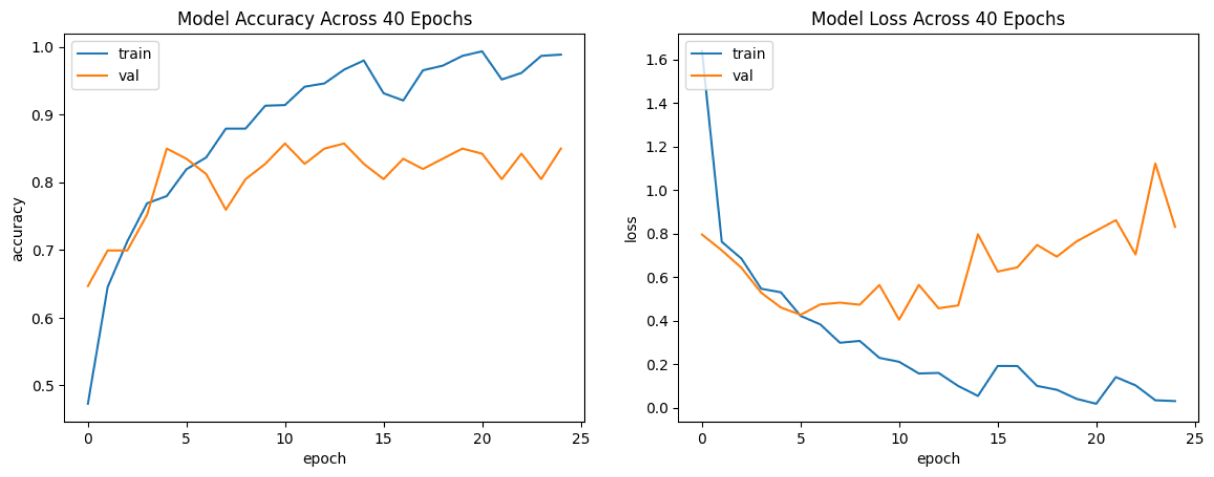

* Our model's training accuracy is significantly higher than its validation accuracy, as seen in the plot above. After a certain number of epochs, the gap between the two continues to widen. The model is indeed overfitting.

* Our model is not overly complicated, but even with only 25 epochs and a small dataset, it can take several minutes to finish training. For larger models and with more data, we may need to train for much longer to observe a trend. It would be a waste of resources to train a model for 100 epochs, only to find out it started to overfit after 60, for example.

* What if we only trained our model up to the point where the gap between training and validation accuracy starts to widen? To accomplish this, we could set a criterion for when the model should stop training. For instance, we could define a condition that the model should stop training if the validation accuracy begins to decrease. With this criterion in place, we could stop the model's training as soon as it starts to overfit — or before - this technique is known as early stopping.

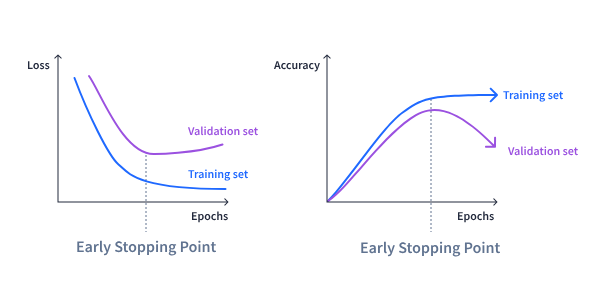

* In Keras, we can create a callback object that we can define and pass to our `model.fit()` method. A callback is an object that can perform actions at different stages of training. For example, as we'll learn below, the early stopping callback can stop a model's training if the validation loss stops decreasing.

* For implementing early stopping, we can use the `EarlyStopping` class as follows:

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, mode='max')

Where,

* `monitor` is the quantity we want to monitor, such as the validation accuracy. The History object that model.fit() returns provides us with a list of the possible quantities we can choose to monitor: ['loss', 'accuracy', 'val_loss', 'val_accuracy'].

* `patience` is the number of epochs after which training will stop if the quantity being monitored has not improved. In the example above, training will stop if val_accuracy has not improved over the last 5 consecutive epochs.

* `mode` can take on one of three possible values:

 * `min`: The training will stop if the monitored quantity, such as the validation loss, has stopped decreasing.
 * `max`: The training will stop if the monitored quantity, such as the validation accuracy, has stopped increasing.
 * `auto`: Keras automatically infers the mode depending on the monitored quanity.

In [ ]:
history = model.fit(train_set_normalized, epochs=25,
                    validation_data=validation_set_normalized,
                    callbacks=[callback])

The `callback` object is passed to the `callbacks` parameter as a list. Keras offers callbacks for different use cases. We can therefore create and pass multiple callbacks, as a list, to `model.fit()`.

In [ ]:
## write out remaining code and print the test accuracies

### Dropout

image.png

* Dropout is a regularization technique in which randomly selected output units of a layer are set to zero during training. We specify a dropout rate, a value between 0 and 1, which determines the fraction of units that are dropped. For example, a rate of 0.5 would result in 50% of the units in that layer being set to zero.

* In Keras, a dropout layer can be defined as follows: `tf.keras.layers.Dropout(rate)`

* `rate` is the dropout rate, a value between 0 and 1. By design, dropout is only applied during training. During the evaluation step, Keras automatically sets the rate to 1 to ensure that all neurons contribute to the evaluation. Dropping random neurons during evaluation would not improve the model's performance.

* The dropout rate is a hyperparameter. Usually, a value of 0.5 to 0.8 is selected for fully connected layers. **For convolutional layers, some research suggests that smaller rates — such as 0.1 to 0.2— are better**. It's better to add one dropout layer at a time, observe its impact, then adjust accordingly.

* Usually when we add one or more dropout layers to a network, we want to allow it to train for longer to compensate for the dropped out nodes.

In [ ]:
model = Sequential()
model.add(layers.Conv2D(kernel_size=(5,5), filters=64, strides=2, padding='valid', activation='relu', input_shape=(227, 227,3)))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Conv2D(kernel_size=(5,5), filters=64, strides=2, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=1, padding='valid'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Conv2D(kernel_size=(5,5), filters=128, strides=2, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=1, padding='valid'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
## write out remaining code and print the test accuracies

### Batch Normalization

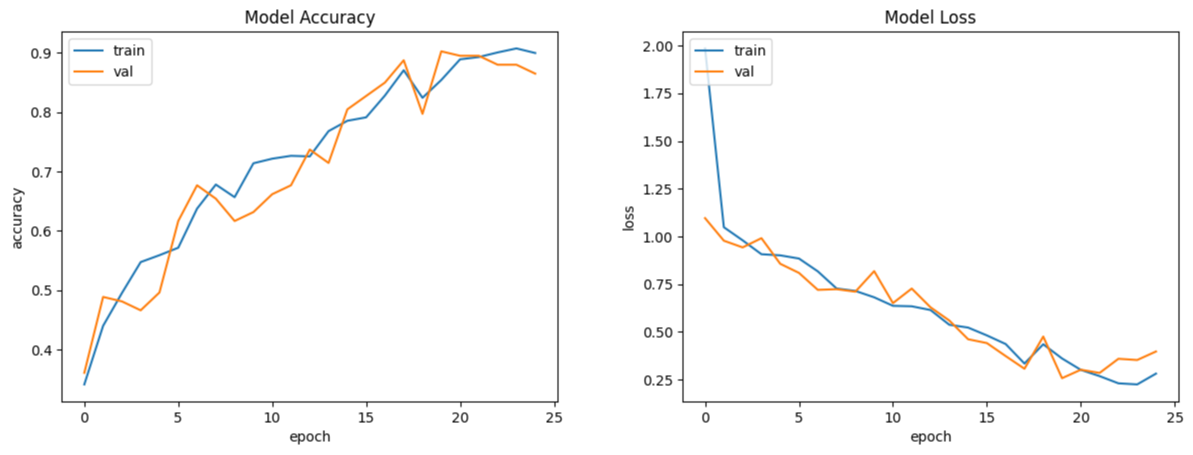

* Its no longer overfitting as before!!

* Notice that the accuracy curves don't quite reach a plateau at 25 epochs, so we could've trained the model for longer to see if we could've achieved even better results.

* Previously, we discussed the importance of normalizing or standardizing our input data. What if we also normalized the activations of the layers in our model?

* This is what batch normalization does. During training, a **batch normalization layer calculates the mean and variance of the current batch of data. It then uses these values to normalize the output of the layer to which it's applied**. This normalization of the activations of the layer has a regularizing effect.

* We can apply a batch normalization layer as well as a dropout layer, but we don'**t necessarily need both**. **Batch normalization shouldn't be used as a replacement for normalizing the input data**.

* In Keras, we can define a batch normalization layer as follows: `tf.keras.layers.BatchNormalization()`

In [ ]:
model = Sequential()
model.add(layers.Conv2D(kernel_size=(5,5), filters=64, strides=2, padding='valid', activation='relu', input_shape=(227, 227,3)))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(kernel_size=(5,5), filters=64, strides=2, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=1, padding='valid'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(kernel_size=(5,5), filters=128, strides=2, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=1, padding='valid'))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
## write out remaining code and print the test accuracies

Our model's performance on the validation set didn't significantly improve after adding the batch normalization layers. It appears to be performing well on the training set, however...

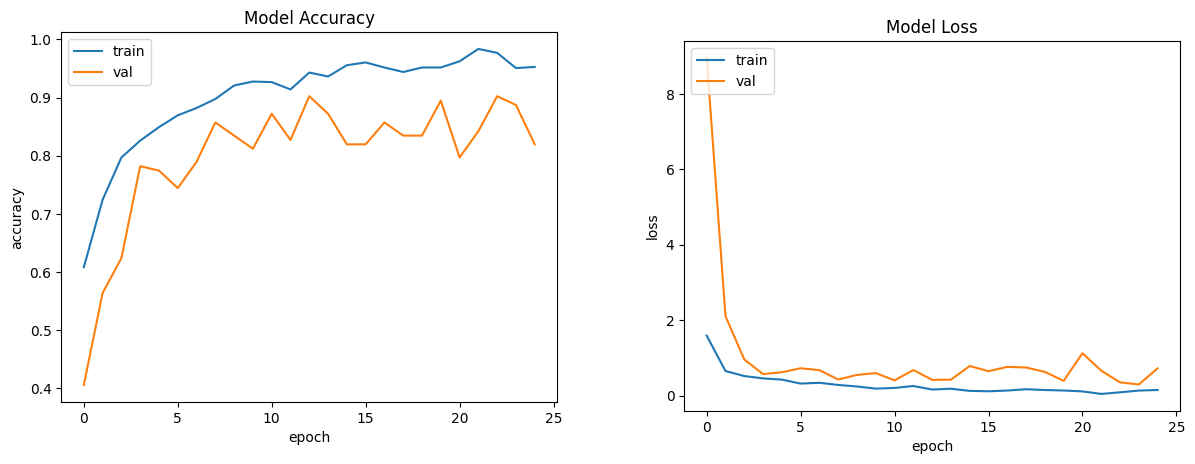

* The reason for the poor performance is because of the difference between how batch normalization layers work during training and at the time of evaluating the validation set. During training, batch normalization uses the mean and variance of the current batch of data to normalize the outputs, whereas, during validation, batch normalization uses a running mean and variance to normalize the outputs.

* During training, the layer keeps track of a running mean and a running variance. It calculates the moving average of the mean and variance of each batch across the entire dataset using the following equations:

 * `running_mean = running_mean ∗ momentum + batch_mean ∗ (1−momentum)`
 * `running_variance = running_variance ∗ momentum + batch_variance ∗ (1−momentum)`

* After the model trains on a batch of data, the running mean and variance are updated according to the equations above. The momentum factor determines how much the current batch affects the running mean and variance values.

 * If momentum was zero, the running mean would be the same as the mean of the last batch of data.

 * If momentum was one, the running mean would be the same as the mean of the first batch of data.

* Either value could result in a biased model, so we need to select an appropriate value for the momentum, between 0 and 1. The running mean and variance values are then used to normalize the validation or test sets. Selecting an appropriate value for the momentum of a batch normalization layer can impact the model's performance on those two sets. **It's another hyperparameter we can tune, although a momentum of 0.9 often improves results.**

In [ ]:
model = Sequential()
model.add(layers.Conv2D(kernel_size=(5,5), filters=64, strides=2, padding='valid', activation='relu', input_shape=(227, 227,3)))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Conv2D(kernel_size=(5,5), filters=64, strides=2, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=1, padding='valid'))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Conv2D(kernel_size=(5,5), filters=128, strides=2, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=1, padding='valid'))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
## write out remaining code and print the test accuracies

### Data Augmentation

image.png

* Our model's performance improved on the validation set! However, there's still some overfitting happening. We could modify the model architecture and tune various hyperparameters to get even better results. But before we invest any time into that, there's something else we should consider first - Data Augmentation.

* Given the small size of our datasets, a lot our experimentation could struggle to yield better results. This brings us to the next type of regularization: data augmentation.

* Our goal is to generalize our model, so having more images is beneficial. However, simply creating copies of the same image won't help our model learn anything new. To ensure our model doesn't overfit, it's important to have enough variation across the images in the dataset.

* If collecting more images isn't feasible, we can transform or augment the existing images to introduce variations. For example, we could take one of the images of the leaves in our dataset and flip it horizontally or vertically.

* In Keras, we can add data augmentation layers to our model. These layers randomly transform images in each batch for each training step. This helps reduce the chance of overfitting, as the model sees different variations of the same image for each training step.

* To flip the images in the dataset, we could add the `RandomFlip` layer to our model: `tf.keras.layers.RandomFlip(mode="horizontal")`

* This is what the transformation would look like, if we flipped the image horizontally or vertically:

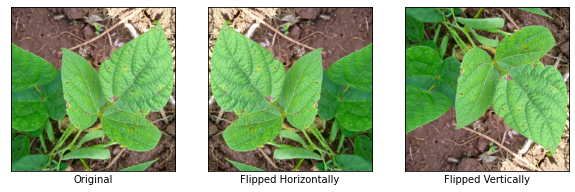

* We could also rotate the images by adding the `RandomRotation` layer: `tf.keras.layers.RandomRotation(factor=0.2)`

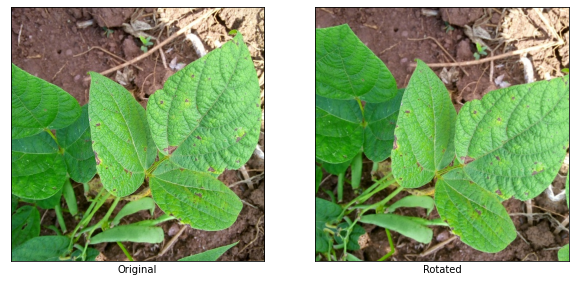

* The image was rotated by a random amount in the range `[-20% * 2pi, 20% * 2pi]`, where the 20% is determined by the value we set for the factor argument. 2pi radians is equivalent to 360 degrees, so the image was rotated by a random angle between -72 to 72 degrees.

* We could even crop the image to a specific height and width using the `RandomCrop` layer: `tf.keras.layers.RandomCrop(height=256, width=256)`

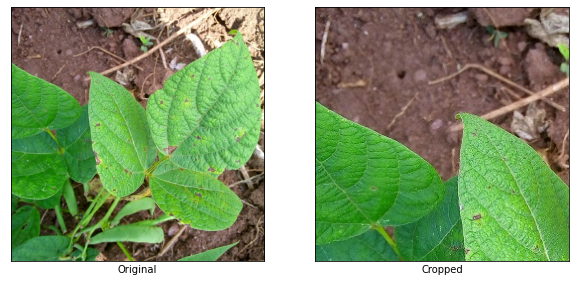

**Selecting Augmentations**

* We can see a potential limitation of certain transformations above. Cropping the image may cause us to lose out on relevant information, which could make it more difficult for our model to learn effectively.

* We must be mindful of which augmentations to choose, depending on our dataset. Cropping our leaves is likely not a good option, as we saw above. If our dataset consisted of handwritten numbers, flipping the numbers would not be beneficial, as our model wouldn't be tested on a flipped 3, for example.

In [ ]:
model = Sequential()
model.add(layers.RandomFlip(mode="horizontal"))
model.add(layers.RandomFlip(mode="vertical"))
model.add(layers.RandomRotation(factor=0.5))
model.add(layers.Conv2D(kernel_size=(5,5), filters=64, strides=2, padding='valid', activation='relu', input_shape=(227, 227,3)))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Conv2D(kernel_size=(5,5), filters=64, strides=2, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=1, padding='valid'))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Conv2D(kernel_size=(5,5), filters=128, strides=2, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=1, padding='valid'))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
## write out remaining code and print the test accuracies

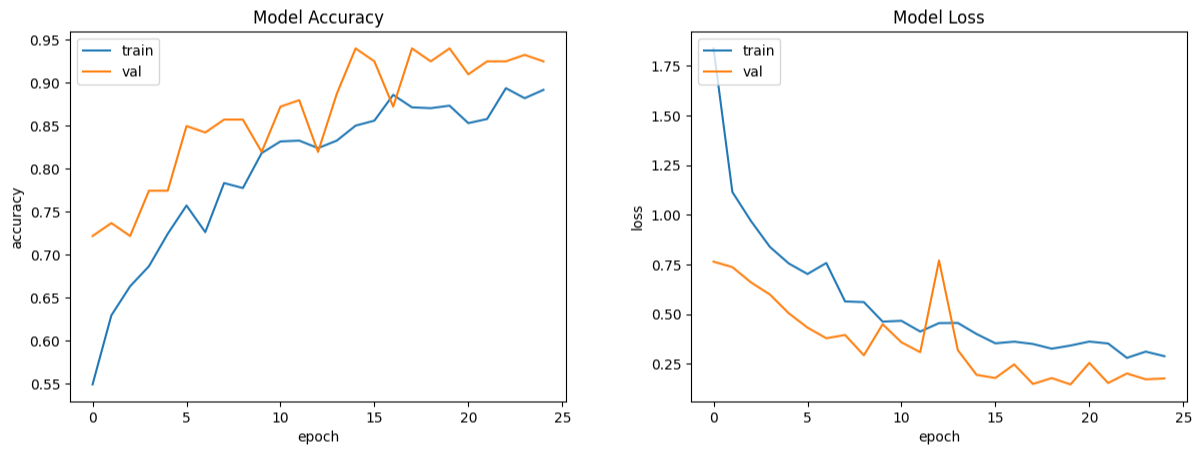

* Adding data augmentation layers helped tackle our model's overfitting! That said, our results are a little unusual; for the most part, the validation accuracy is higher while the validation loss is lower for its training counterparts.

* It's quite **unusual for a model's validation accuracy to be consistently higher than its training accuracy**, as typically a model performs better on the data it was trained on (leading to higher training accuracy) compared to unseen data (validation set).

* However, there are a **few potential reasons** for why this might occur:

 * **Dropout or other regularization techniques during training**: Our model uses dropout layers during training, which randomly "turns off" certain neurons in an attempt to prevent overfitting. This means that the model could perform worse on the training data (since it's effectively a reduced version of the model), but better on the validation data (since all neurons are active).

 * **Size and representativeness of the validation set**: If the validation set is small and/or non-representative of the overall distribution, it's possible that the model could just happen to perform well on it by chance. In other words, it's possible that the model has learned features that are especially good at predicting the validation set, but not necessarily the broader data distribution.

 * **Training set is harder**: It is possible that our training set has more complex or more difficult examples, while our validation set is somewhat easier for our model to predict. This is likely the cause of our unusual results here since augmenting the data may have made the training set more complex compared to the validation set which hasn't been (nor should it be) augmented.

## Advanced CNN Architecture - ResNets

### Importing Dataset

We'll work with the **Fruits-360 dataset** that was collected by researchers Horea Muresan and Mihai Oltean. The dataset contains more than **90,000 images of fruits and vegetables spread across 131 classes, each measuring 100x100 pixels**.

In [ ]:
!wget https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/fruits_dataset.tar.gz

In [ ]:
# To uncompress the data

import tarfile

def extract_tar_gz(file_path, output_path):
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path=output_path)

# Use it like this:
# extract_tar_gz('/path/to/yourfile.tar.gz', '/path/to/output/directory')
extract_tar_gz('/content/fruits_dataset.tar.gz', '/content/')

The dataset has only train and test folders, hence preparing validation data from the train dataset...

In [ ]:
train_set = tf.keras.utils.image_dataset_from_directory(
        directory='/content/fruits/train',
        labels='inferred',
        label_mode='categorical',
        batch_size=256,
        image_size=(100, 100),
        validation_split=0.25,
        subset="training",
        seed=417)

validation_set = tf.keras.utils.image_dataset_from_directory(
        directory='/content/fruits/train',
        labels='inferred',
        label_mode='categorical',
        batch_size=256,
        image_size=(100, 100),
        validation_split=0.25,
        subset="validation",
        seed=417)

test_set = tf.keras.utils.image_dataset_from_directory(
        directory='/content/fruits/test',   # path to test folder of dataset
        labels='inferred',
        label_mode='categorical',
        batch_size=256,
        image_size=(100, 100),
        shuffle=False)

**For the train_set**:

* `validation_split`: A value between 0 and 1 that determines what fraction of the training data should be reserved for the validation set. A value of 0.01 indicates that 0.01 times the number of images in the training data will be used to create the validation set.

* `subset`: A string value that lets Keras know whether we want the subset of data to be the training set or the validation set. With validation_split=0.01, if we set `subset="training"`, then the function call returns 99% of the data for training purposes.

**For the validation_set**:

* The `directory` is the same as the training set directory because we're splitting the training set to create the validation set.

* The `validation_split` also remains the same to indicate that 0.01 times the number of images in the training data will be used to create the validation set.

* We set the `subset` parameter to `validation` so Keras can split the training data and store the validation subset into validation_set. With validation_split=0.01, if we set `subset="validation"`, then the function call returns 1% of the data for validation purposes.

* The `seed` is the same for both calls. This ensures that Keras splits the training and validation sets in the same way, avoiding duplicates in the validation set. By setting the same `seed`, Keras ensures that the data is split consistently across the two function calls.

### Preprocessing & Exploration

* Now that we've loaded our datasets, we need to normalize them. In a previous lesson, we discussed different approaches for preprocessing our data, one of which was to rescale the pixel values to a range like [0, 1]. In this lesson, we'll follow that approach.

* Our dataset consists of color images, whose pixel values range from 0 to 255. To rescale them to be between 0 and 1, we can divide the pixel values by 255. We can do this by creating a Rescaling layer and setting the scale parameter to 1/255.

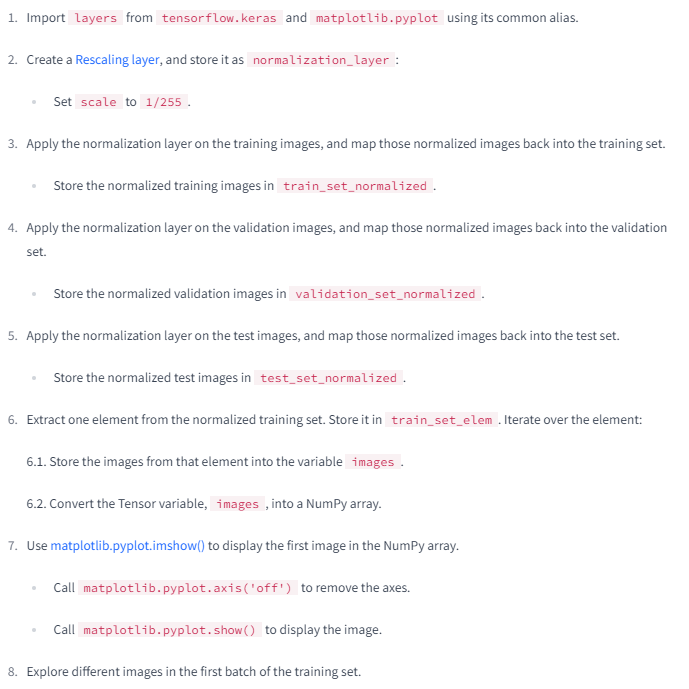

In [ ]:
# refer above section to complete the codes

### Residual Neural Networks (ResNets)

Here are some of the images from our training set, along with their corresponding labels:

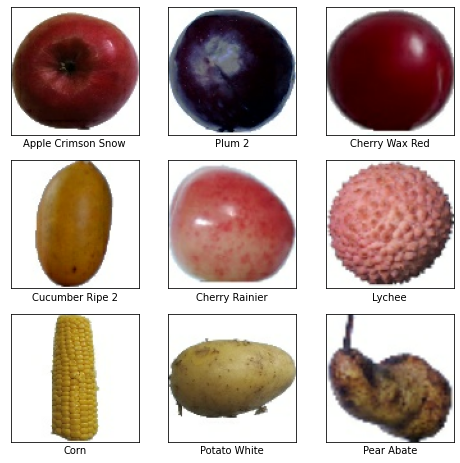

* Notice that the dataset consists of images with only a single fruit or vegetable, without any other objects or anything else in the background. A CNN-based model would likely be able to effectively extract relevant features from these images. However, the images are relatively small, and a classifier might have difficulty distinguishing between similar-looking fruits, such as the apple and cherry in the images above. With over 50,000 images across 131 classes in our training set, we need to create a model that can handle the complexity.

* We could create a more complex model by including a large number of layers in our network. However, this may not be as beneficial as one might think. Before 2015, the performance of deep learning models would decrease when more layers were added. In 2015, researchers developed a neural network architecture that addressed this issue. The core of this network was something they called a **residual block**:

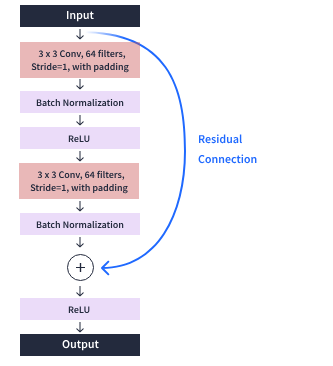

* A residual block consists of two convolutional layers with the parameters shown above. The input to the first convolutional layer is added to the output of the second convolutional layer, which is referred to as a residual connection or skip connection. This allows us to skip over a layer, then add the input to the output of the second convolutional layer. To simplify the diagram, we can express it as a mathematical equation: `y = x + block(x)`
; where,
 * `x` is the input,
 * `y` is the output, and
 * `block(x)` is a simplified representation of the application of the two convolutional layers on the input.

* If the convolutional layers were unable to extract useful features from the input, the input would still contribute to the output. The model would still be able to learn to extract features from the input as it trained. However, if the convolutional layers were able to extract relevant features from the input, the addition of `x` would only benefit them, since the layers would have access to more information to learn from. If we were to stack another residual block to the one above, our equation would change to: `y2 = y + block2(y) = x + block(x) + bloack2(x + block(x))`

* Each subsequent block would have access to information from the first input, thereby allowing the model to always be able to learn from the input. The researchers were able to empirically show that these residual blocks allowed them to create much deeper neural networks without the degradation in performance.

* A neural network created using these residual blocks is called a Residual Neural Network, also referred as ResNet. The researchers created several ResNets with varying numbers of layers, such as 18, 34 and 152. Different ResNet architectures can have a different number of ResNet blocks, and each ResNet block can have a different number of convolutional layers. In this lesson, we'll only implement **ResNet18, which is comprised of 18 layers**. Here's what the network looks like:

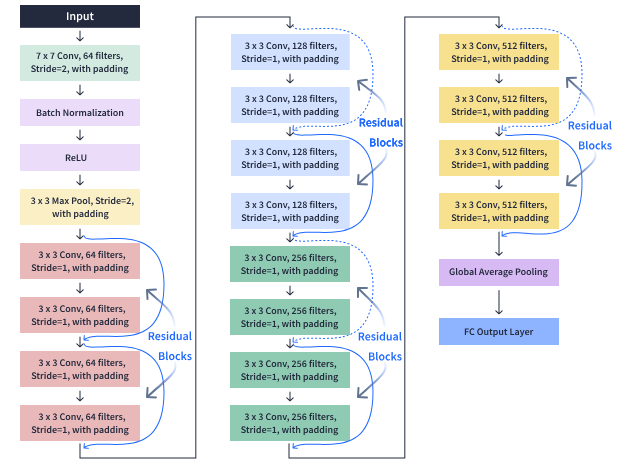

* The network starts with a convolutional layer. We apply batch normalization and the ReLU activation function to the output of that layer. This is followed by max pooling. We start using residual blocks after the max pooling layer. There are 8 blocks in total, each with 2 convolutional layers. The curved blue arrows represent the skip connections. When a curved blue arrow uses a dashed line, it indicates that the output of the corresponding block has a different number of filters than the input to that block.

* After the final residual block, we apply a global average pooling layer, and finally, we have a fully-connected layer as the output layer.

#### ResNets I

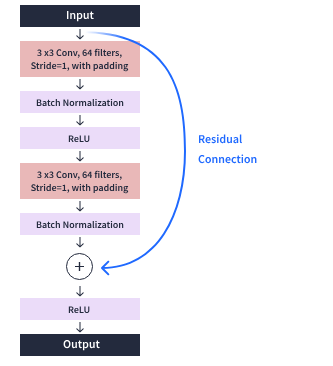

* The network we're building has 8 residual blocks. To make things easier, we'll create a function for a residual block and reuse it across the model.
* Since we can't use the TensorFlow Sequential API to create model layers inside a function and then call that function multiple times, we'll **implement this model using the Functional API** instead.

* Refer section I of this colab for Functional API...

* The convolutional layers in the block above have 64 filters. Since different residual blocks in `ResNet18` will have convolutional layers with different numbers of filters, our function will use the number of filters as a parameter. The function will also require the input to the block as a parameter so we can add it to the output of the second convolutional layer using the Add layer class.

* We can perform an element-wise addition on any two tensors of the same shape — let's say x and y — using the Add layer class as follows: `output = tf.keras.layers.Add()([x, y])`

* The layer is called on a list containing the two tensors. In the residual block, we can then apply the ReLU activation function to the output of the addition. This brings us to an important distinction between the ResNet model we're building in this lesson and the models we've built previously.

* For the convolutional layers in the block above, we apply batch normalization before applying ReLU. There's no definitive answer to which should be applied first. In some models, even ones that don't use residual connections, batch normalization before the activation function results in better performance. In others, batch normalization after the activation function is a better option. In fact, the authors of ResNet also discovered later that applying batch normalization and ReLU before the convolutional layer positively impacted the performance of deeper models. For our implementation of ResNet18, we'll stick with the approach shown in the figure above: apply batch normalization before applying ReLU.

* The **kernels for each convolutional layer are initialized using the He Normal initializer**. We don't need to delve into the details of this initializer. The same researchers who created ResNets also created this initializer for deep neural networks that uses ReLU as an activation function. The HE Normal initializer is a good choice for using ReLU in a network.

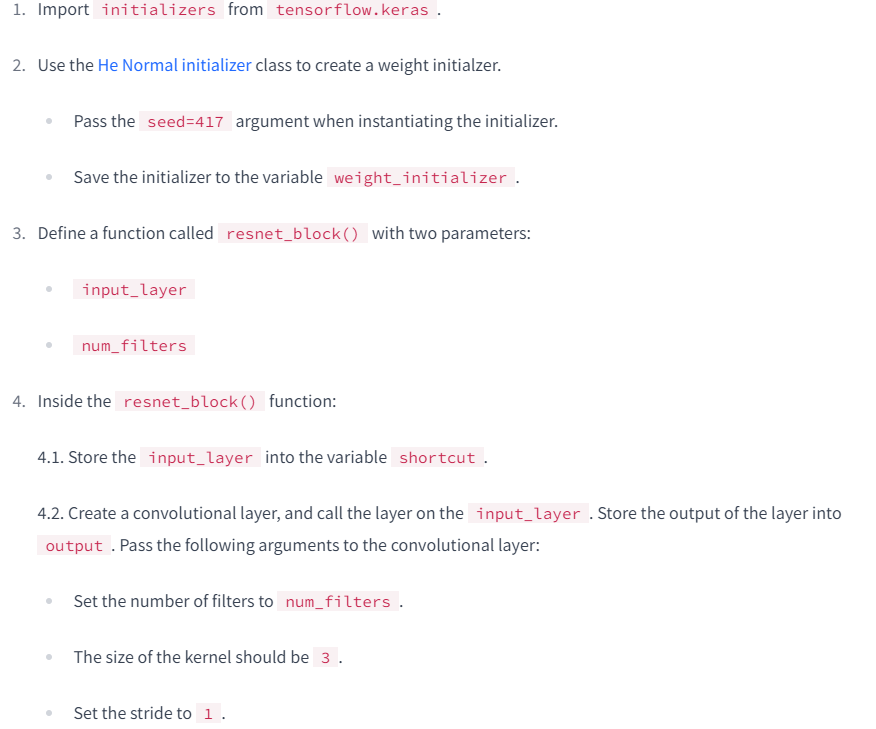

image.png

#### ResNets II

* Previously, we created the `resnet_block()` function to assist with creating the residual blocks our ResNet18 model will use. On this screen, we'll create another function that builds the ResNet18 model itself.

* Our strategy will be to instantiate the model inside the function, then have the function return the model. However, we'll only add two residual blocks to our model, as shown in the image below:

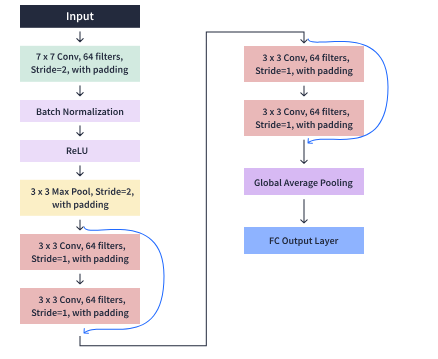

Since we'll begin by building the model shown in the image above, our new function will need to add the following layers to our model:

* An input layer

* A convolutional layer with kernels initialized using the He Normal initializer. This layer is followed by:

 * A batch normalization layer
 * A ReLU activation

* A max pooling layer. Unlike the max pooling layers we included in previous models, this one does apply padding to its input. This was a design choice made by the authors.

* Two residual blocks. Each block's output has 64 channels. To create these blocks, we'll call the `resnet_block()` function we created on the previous screen.

* A global average pooling layer. We'll discuss that below.
 * A fully-connected output layer with number of units equal to the number of classes. The latter will be included as a parameter in our function definition.

 * We're familiar with most of the layers above except the Global Average Pooling 2D layer. Let's say the output of our second residual block is a tensor with the dimensions (25, 25, 64). If we wanted to feed this output into a fully-connected layer, we'd have to flatten it first. The flatten operation would result in a layer with a shape of 25*25*64 = 4000 units. With an even deeper network, that would result in a lot more model parameters. The increase in the number of parameters could potentially contribute to overfitting.

 * A global average pooling layer was developed as an alternative to flattening the output of the convolutional layers and feeding them into fully-connected layers. If the output has the shape (25, 25, 64), that means it has 64 feature maps, each of size (25, 25). The global average pooling layer calculates the average of each of those feature maps outputting a layer with only 64 units.

 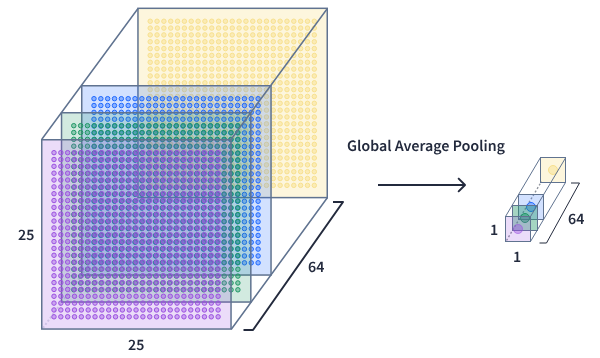

* A global average pooling layer drastically reduces the dimensions of its input, thereby reducing the number of parameters. The dimensionality reduction has a regularization effect and helps prevent the model from overfitting. Even with such a drastic change, the layer has been shown to help with a model's performance.

* As we saw during our data exploration earlier in this lesson, each image in our dataset contains exactly one fruit or vegetable, with no other objects or background. Because of this, we can expect that the convolutional layers of our model will extract only relevant features. Therefore, even if we were to average each feature map, we can assume that the averaged features would still be relevant to the model. **For a different dataset, this might not necessarily hold true.**

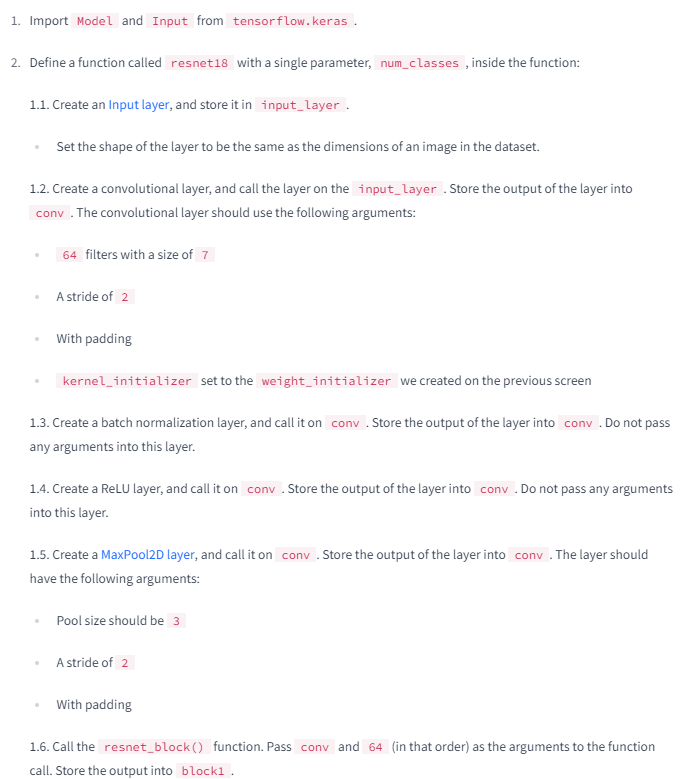

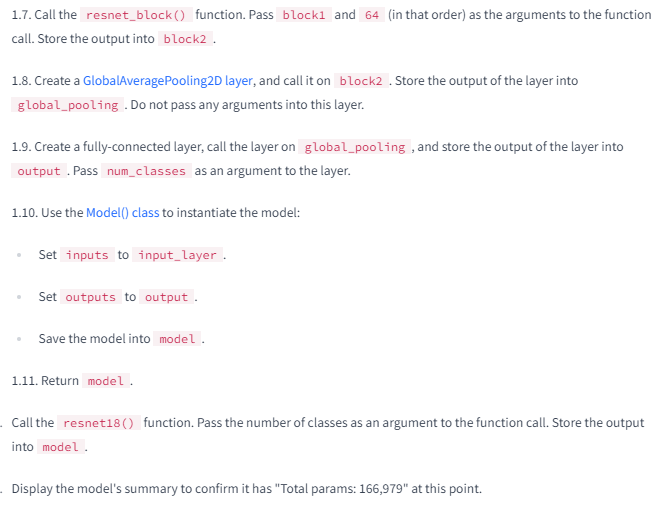

* Our model's summary included the following:

 * Total params: 166,979
 * Trainable params: 166,339
 * Non-trainable params: 640

* Trainable parameters (params) are the parameters of our model that get updated during backpropagation. The weights of the model can be trainable parameters.

* Non-trainable parameters are parameters that don't get updated during training. Our model in this lesson has 640 non-trainable parameters so far. That raises the question: why are there any non-trainable parameters at all?

* Those 640 parameters come from the batch normalization layers. In the previous lesson, we learned how a batch normalization layer keeps track of the mean and variance values for each batch of data. While those values are calculated during training, they're not updated during backpropagation and thus show up as non-trainable parameters in our model summary.

* Our model has a total of 5 batch normalization layers. Each layer has a shape of (None, width, height, 64) per the model summary, where None reflects the potential batch size. Each layer calculates 2 values — the mean and variance — for each batch of data across every one of those 64 channels. And that's how we get 640 parameters:

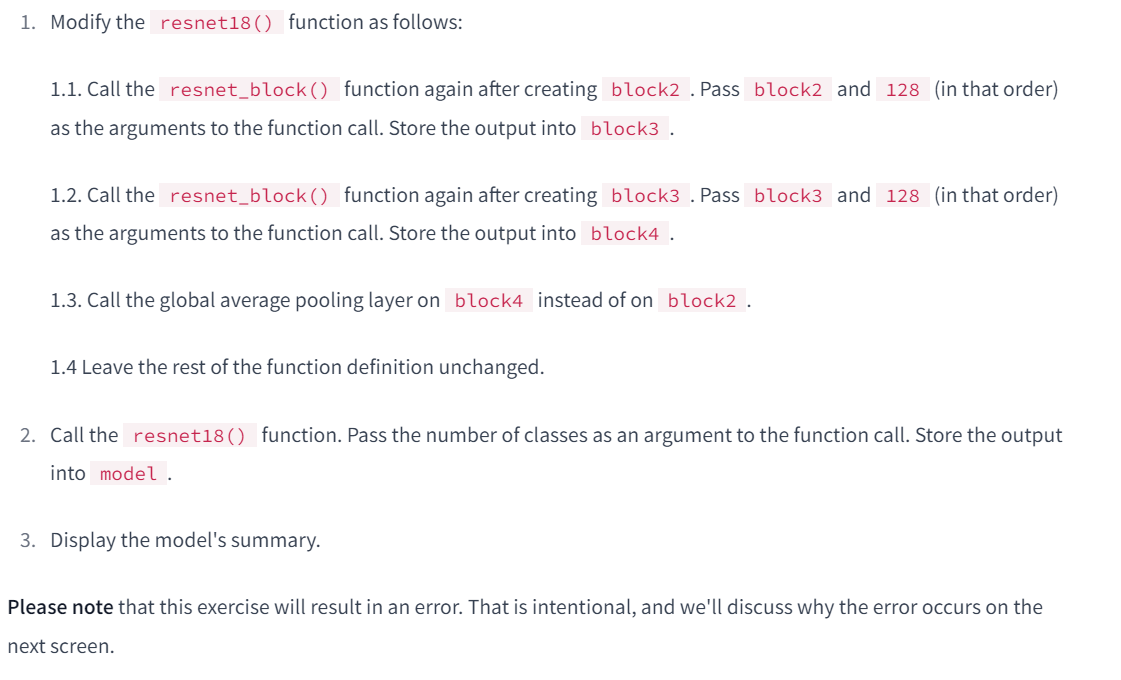

#### Down Sampling

* Running our code on the previous screen resulted in the following error: `ValueError: Inputs have incompatible shapes. Received shapes (25, 25, 128) and (25, 25, 64)`

* We get the error when we try to add the input layer with 64 channels to the output of the second convolutional layer, which has 128 channels. The dimensions don't match!

* There are two different ways we could handle this:
 * We could add padding to the input layer.
 * We could add a convolutional layer that changes the number of channels from 64 to 128.

* The authors of ResNet concluded the second option performs better than the first, so we'll implement the same:

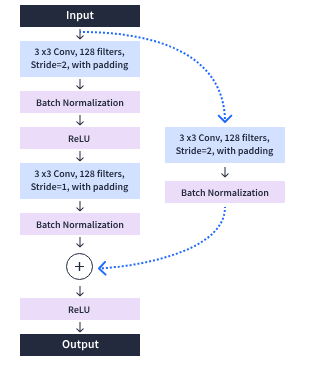

* The convolutional layer included in the residual connection has kernels of size 1.

* Both the convolutional layer included in the residual connection and the first convolutional layer on the left side have strides of 2.

* A kernel of size 1 (or (1, 1)) implies that only one kernel value is convolved with only one pixel value from the input. The convolutional operation would map each input pixel to a corresponding output pixel. Since there are no other pixels in the neighborhood for the operation to include in its calculation, each output pixel value is just a scaled version of the corresponding pixel. This allows for the convolutional layer to better preserve the input, while still changing the number of channels in the output.

* Setting the strides to 2 reduces the dimensions of the layers. In the model we built in previous lessons, if we were adding more layers, we would have had to include a max pooling layer at some point to downsample the input in order to reduce the number of parameters. Instead of max pooling, we can increase the number of strides of the convolutional layers to downsample the inputs to those layers.

* We don't need to downsample the input for the second convolutional layer in the block because the output of that layer has the same dimensions as the output of our residual connection.

* We'll modify the `resnet_block()` function to account for these two changes, then add the remaining residual blocks to complete our implementation of ResNet18.

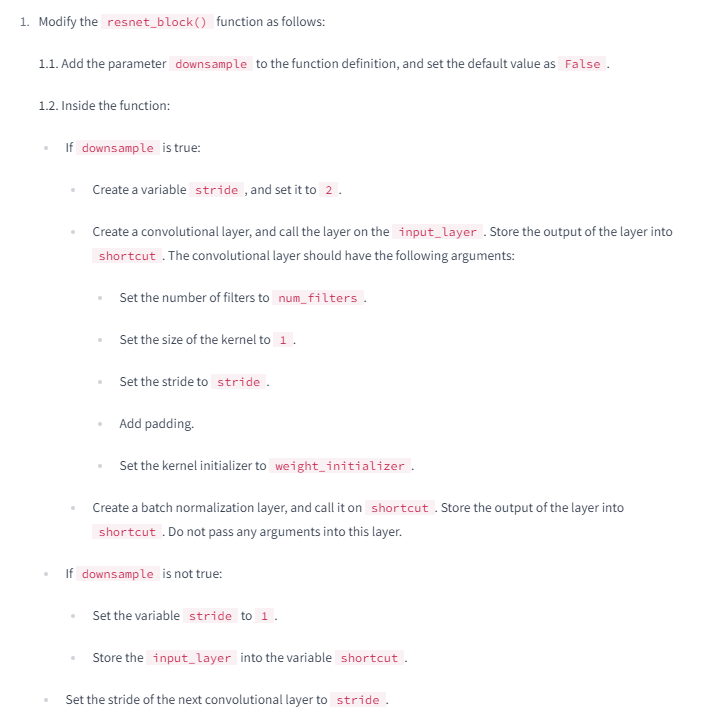

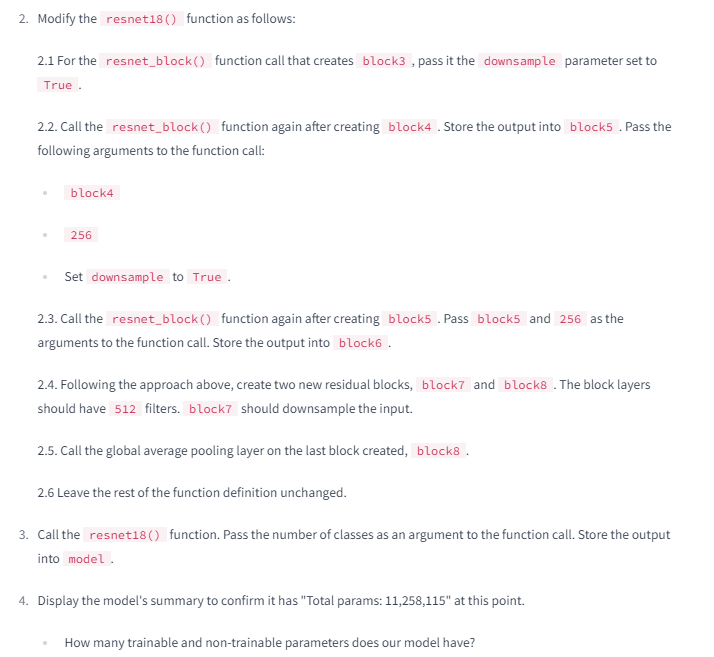

### Train & Eval

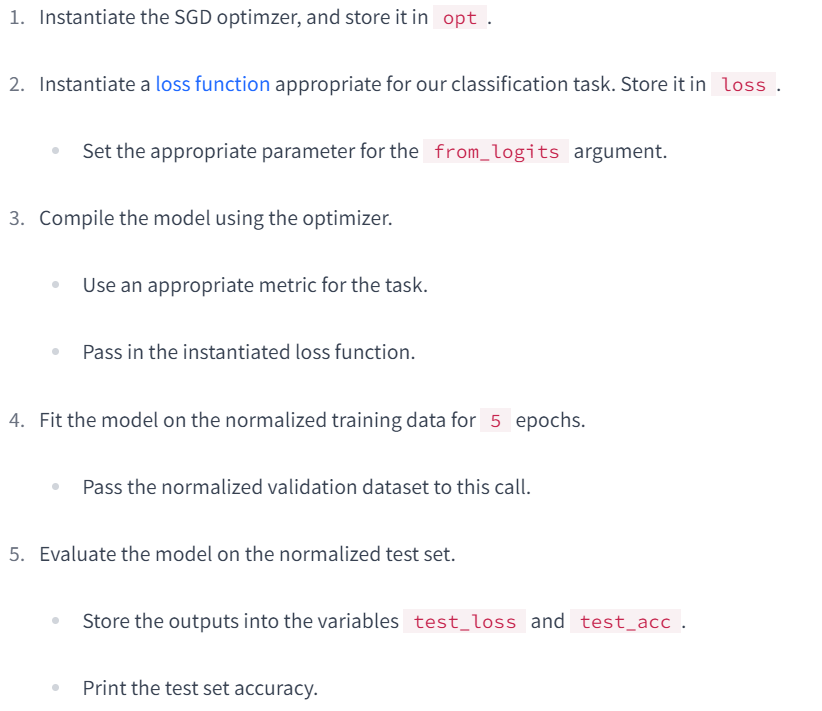

## Transfer Learning

### Theory

* So far we've learned about different weight initializers in our models which randomly select the initial weight values from a distribution, such as the normal distribution. As our model trains, it updates those weights across all of its layers.

* During each training step, the weights in a convolutional layer update, enabling the kernels of that layer to extract relevant features from the input more effectively. Similarly, the weights in a fully-connected layer update over each training step, improving the layer's ability to classify features from the convolutional layers into specific classes.

* A trained model consists of multiple layers, with each layer storing specific weights that enable the model to perform a particular task, such as classification. These weights are carefully calculated during the training process and are essential for the model's ability to make accurate predictions.

* Let's say we trained a model on the ImageNet dataset, which contains millions of images across 1000 categories, such as birds, fruits, vehicles, and even household objects like salt shakers. A model trained on such a dataset with reasonably high accuracy would've learned weights that could extract features across all those categories!

* What if we initialized the weights of the convolutional layers of a new model using the weights of a model trained on ImageNet?

* **That's the basis of transfer learning. Instead of creating our own model and letting it train on a dataset to learn those weights, we use the weights from a model that has already been trained on a dataset like ImageNet. The already trained model is called a pre-trained model.**

* The pre-trained model has already learned to extract a wide variety of features. We can transfer the knowledge it has gained to a new model and use that knowledge to attempt to solve a similar problem on a different dataset.

* We start the transfer learning process by creating a new model that's based on a pre-trained model. For example, we could create a new model based on the ResNet18 architecture that's been pre-trained on ImageNet. Our new model would have the same layers and weights as that of the pre-trained model. We could then train the new model on our dataset, like the Fruits-360 dataset.

* However, that presents us with two problems.

 * **First problem:** The Fruits-360 dataset only has 131 classes. The pre-trained model, trained on ImageNet, was trained on 1000 classes. We'd have to modify the final output layer of our new model so it outputs only 131 values, not 1000.

 * **Second problem**: The weights of the pre-trained model are capable of extracting features from a wide variety of classes. We want to rely on the knowledge stored in those weights. **If we re-trained our new model on our new dataset, those weights would get updated and we could potentially lose all that valuable knowledge gained by the pre-trained model. To solve this, we freeze the weights in the convolutional layers of the model**.

* Freezing the layers would ensure that those weights don't get updated as the new model trains on our new dataset. We only train the fully-connected layers of the model since those layers are responsible for taking in the features from the convolutional layers and then classifying those features.

* Here's a simplified representation of the above workflow:

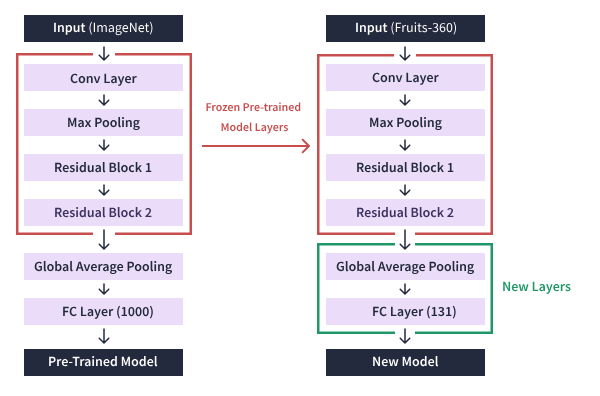

### Preparing the Dataset

We'll work with the **Fruits-360 dataset** that was collected by researchers Horea Muresan and Mihai Oltean. The dataset contains more than **90,000 images of fruits and vegetables spread across 131 classes, each measuring 100x100 pixels**.

In [ ]:
!wget https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/fruits_dataset.tar.gz

In [ ]:
# To uncompress the data

import tarfile

def extract_tar_gz(file_path, output_path):
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path=output_path)

# Use it like this:
# extract_tar_gz('/path/to/yourfile.tar.gz', '/path/to/output/directory')
extract_tar_gz('/content/fruits_dataset.tar.gz', '/content/')

The dataset has only train and test folders, hence preparing validation data from the train dataset...

In [ ]:
train_set = tf.keras.utils.image_dataset_from_directory(
        directory='/content/fruits/train',
        labels='inferred',
        label_mode='categorical',
        batch_size=256,
        # image_size=(100, 100),
        validation_split=0.25,
        subset="training",
        seed=417)

validation_set = tf.keras.utils.image_dataset_from_directory(
        directory='/content/fruits/train',
        labels='inferred',
        label_mode='categorical',
        batch_size=256,
        image_size=(100, 100),
        validation_split=0.25,
        subset="validation",
        seed=417)

test_set = tf.keras.utils.image_dataset_from_directory(
        directory='/content/fruits/test',   # path to test folder of dataset
        labels='inferred',
        label_mode='categorical',
        batch_size=256,
        image_size=(100, 100),
        shuffle=False)

**Normalizing the images:**

To normalize the validation set images, we can follow the steps below:

`validation_set_normalized = validation_set.map(lambda x, y: (normalization_layer(x), y))`



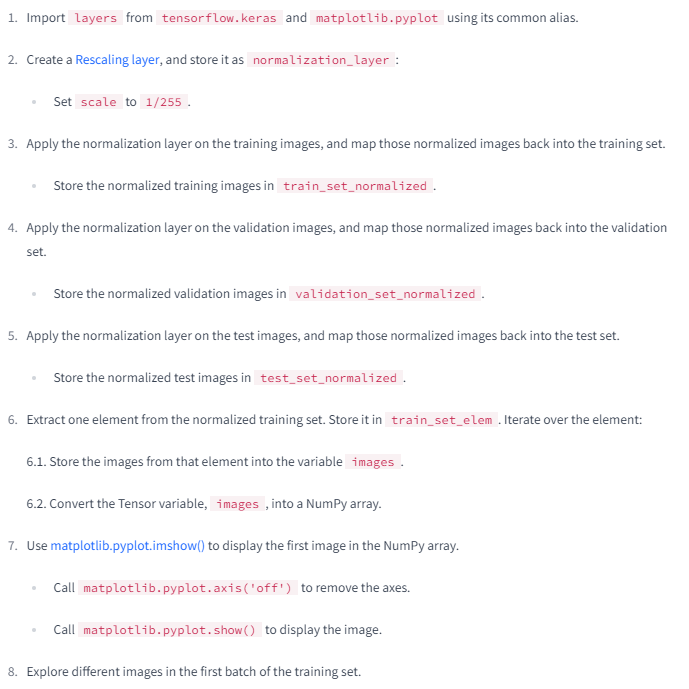

### Loading Pre-Trained Model

* The first step of our transfer learning process will be to create a new model using a pre-trained model. Thankfully, TensorFlow has several pre-trained models that we can access using the tensorflow.keras.applications module.

* We'll use a ResNet50 model that was pre-trained on a subset of ImageNet. There are some differences between the ResNet18 and ResNet50 architectures. The latter has more residual blocks, and each residual block has more convolutional layers compared to the former. ResNet50 uses a model architecture that looks like this:

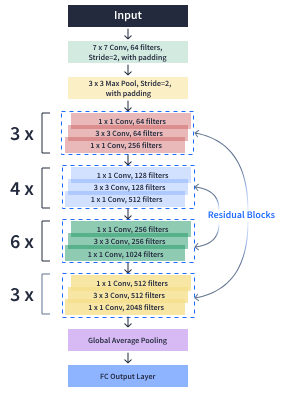

* The above is a simplified representation of the architecture. Each residual block contains three convolutional layers, and each residual block is repeated a certain number of times. For example, the first residual block is repeated 3 times, the second one is repeated 4 times, and so on.

* One of the good things about transfer learning is that we don't always need to fully understand the pre-trained model's architecture.

* We can create the base model, an instance of the pre-trained model, as follows:

In [ ]:
from tensorflow.keras import applications

base_model = applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(100, 100, 3)
)

Where:

* `include_top` refers to **whether or not we want to include the fully-connected layers of the model**. The word "top" might seem counterintuitive, but it's just an old naming convention used to refer to those layers.

* `weights` refers to which weights we want to load in for our model. By setting it to 'imagenet', we indicate that we want the model to be loaded in with weights of a ResNet50 model that was trained on ImageNet.

* `input_shape` is the shape of the input images we plan to input into our model.

### Training the Model

* The base model we created on the previous screen includes all layers from ResNet50 except the fully-connected layers. We need to add those next. Before we do that, we need to make sure that the weights of our convolutional layers don't get updated during training. In other words, we'll need to freeze those layers.

* Models in TensorFlow/Keras have an attribute called `trainable`. We can set this attribute to either True or False depending on whether we want the model to be trainable. Since our base_model only contains convolutional layers so far, we can freeze the entire model by setting this attribute to False: `base_model.trainable = False`

* After that, we can add the fully-connected layers to our base model. The process for this is similar to how we would create a model using TensorFlow's Functional API.

* We first create an Input layer.

* A model in Keras has a `call()` method that allows us to call the model as a function. We can use the `call()` method and call `base_model` as a function after creating the input layer. The function call takes in:

 * The input layer

 * A parameter called training, set to False

* ResNet50 contains a lot of batch normalization layers. The batch normalization layers only calculate the mean and variance values of each batch of data.

* Although those values are not something the model learns, they do get updated when we train our model on the new dataset because the batches of images it will train on will be different than those used initially to train our base model.

* When we train our new model, we don't want those values to get updated as well. Setting training to False ensures that. We'll discuss this in more detail on the next screen.

* This is what our function call would look like: `features_layer = base_model(input_layer, training=False)`

* The function call will create a layer that acts as a reference to our base model. We can then flatten this layer and add some fully-connected layers on top of it. Or we could instead apply a global average pooling layer, followed by an output layer. That's a design choice we can make as we see fit. In this lesson, we'll use a global average pooling layer.

* We can then instantiate a model using the Model() class by passing in the input and output layers.

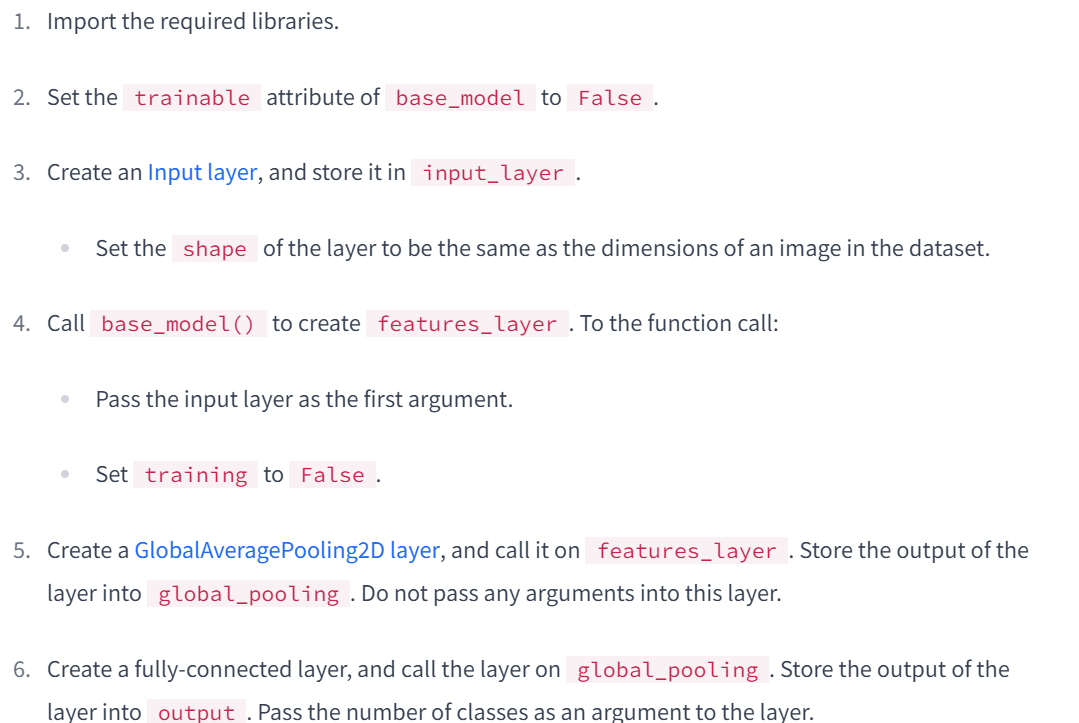

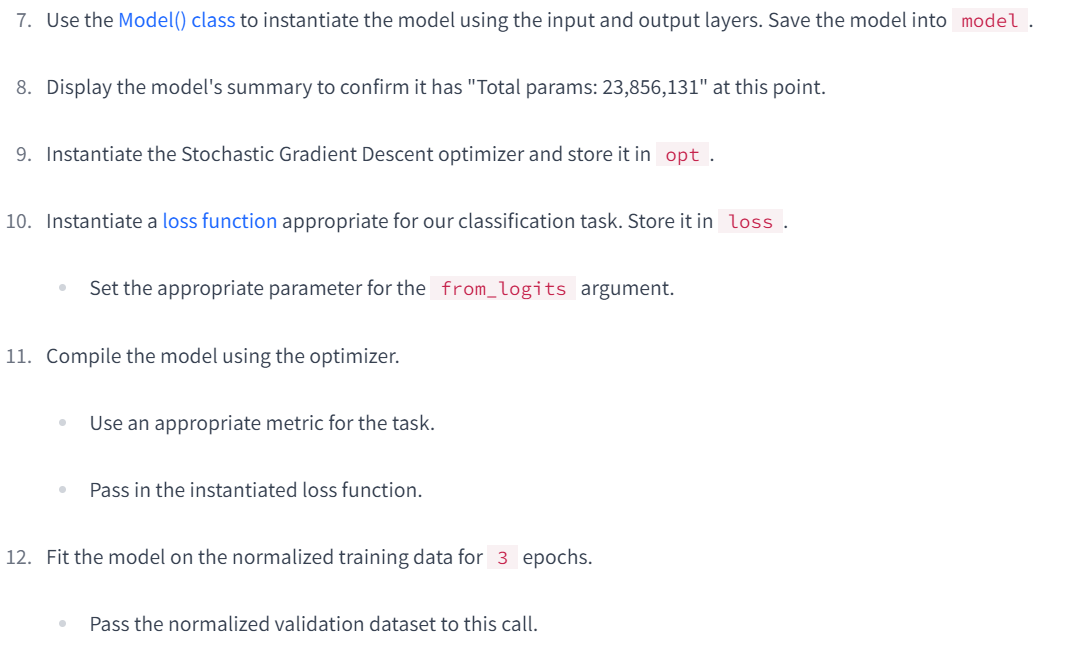

### Preprocessing the Input

* Our pre-trained model is performing very poorly on our new dataset. The reason for this is that our pre-trained model was trained on a completely different dataset than the one we're using. In particular, the dataset it used was preprocessed in a particular way.

* Previously we learned that the validation and test datasets should be preprocessed similarly to the training dataset. Similarly, when we use a pre-trained model, we need to preprocess our new training data the same way the pre-trained model's original training data was preprocessed. The same preprocessing is applied to all the datasets — the training, validation, and test sets.

* We need to make sure that we perform the same preprocessing that was performed on ImageNet to the Fruits-360 dataset. The ResNet50 documentation points out the kind of preprocessing it used:

 * `resnet.preprocess_input` will convert the input images from RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset, without scaling.

* The conversion of RGB to BGR implies that the red and blue input channels are swapped. The following visual depicts the differences between the preprocessing we applied earlier in this lesson and the preprocessing that we required:

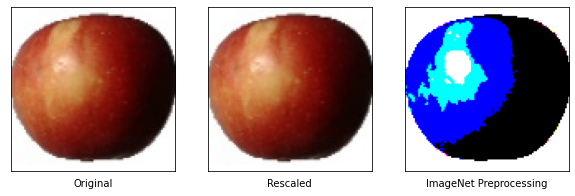

* The above images were generated using Matplotlib. The original image has pixel values between 0 and 255 and are all integers. The rescaled image has pixel values between 0.0 and 1.0 and are all floats. Because of how Matplotlib displays those two ranges of values, the images appear the same, even though their pixel values are different. The third image is preprocessed using the same preprocessing that was applied to ImageNet. We can see how different it really is to our rescaled image. No wonder we weren't getting good results!

* TensorFlow provides us with a function to apply the ImageNet preprocessing on our dataset. We can call the function, `tensorflow.keras.applications.resnet50.preprocess_input()`, on our input layer: `output = applications.resnet50.preprocess_input(input_layer)`

* By calling the function on the input layer, we don't have to preprocess our datasets individually. The function call will be part of our model and be automatically applied to the datasets. Since we're preprocessing the input via this layer, we don't have to normalize the datasets like we did after loading in the data as we did earlier in this lesson.

* This is the reason why we set the training argument to False when we call our `base_model()` function. The frozen batch normalization layers store information related to the original, preprocessed training data. We don't want that information to be overwritten or updated when we train our new model. Setting the training parameter to False ensures that doesn't happen.

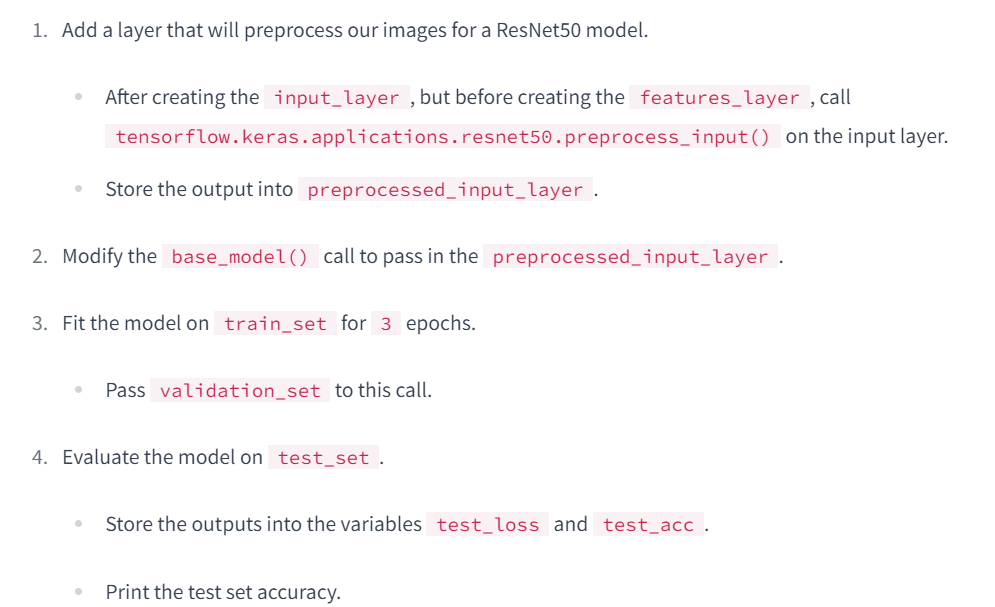

* Our new model is performing quite well! In the previous lesson, our ResNet18 model achieved a validation accuracy of ~99% and a test set accuracy of ~95% after training for 5 epochs. Our transfer learning approach, with a pre-trained ResNet50 model, achieved a validation accuracy of ~98% and a test set accuracy of ~92% after training for just 3 epochs!

* We didn't even have to worry about implementing 50 layers ourselves or about implementing our own architecture. What's especially surprising is how well the model performs, given ImageNet does not contain the same classes as Fruits-360. The pre-trained weights were still able to extract relevant features from the latter dataset. This is the magic of transfer learning!

### Fine-Tuning

* There might be instances where our dataset might be too different to the one the pre-trained model was trained upon, or our dataset might be too small. We could end up with a relatively poorly performing model.

* In such a situation, we could try to fine-tune our model. Fine-tuning our model involves unfreezing the convolutional layers of our base model, then re-training it.

* This allows the pre-trained weights to update based on the new dataset. While this could be helpful, **we also don't want the pre-trained weights to change so drastically that the model performs even worse**. To account for that, when we re-train the model, we'll **choose a very small learning rate**. The small learning rate ensures that the weights only get updated by small amounts.

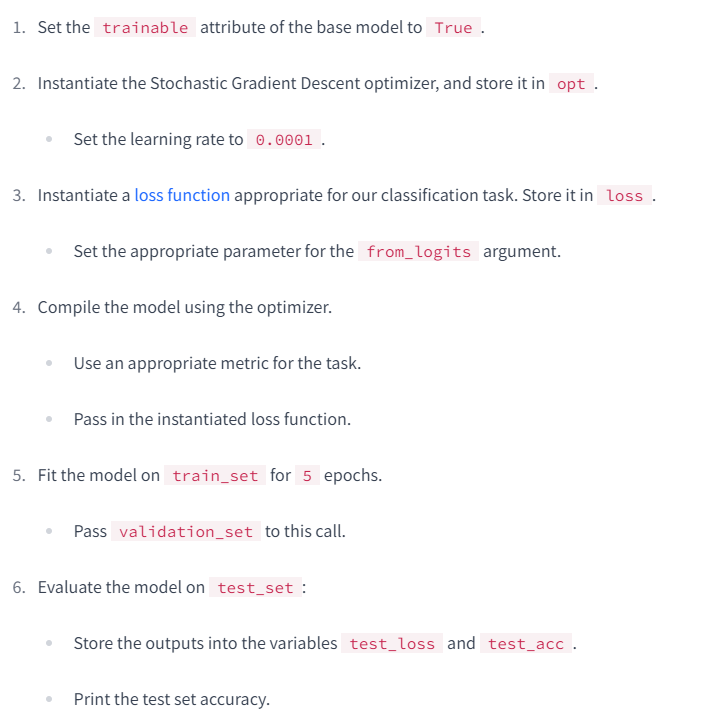

Fine-tuning our model did improve its performance; the validation accuracy came out to ~99% and the test set accuracy was ~94%. We could always experiment more if we wanted to.

### Transfer Learning on the Beans Dataset

* The beans dataset has only 1034 images in the training set and 133 in the validation set. We noticed that our models would either overfit on the training set or not perform too well when we added some regularization.

* The beans dataset consists of images of dimensions (500, 500, 3). ResNet50 is a fairly large model. It would take a powerful GPU with a lot of memory to be able to handle model training. As mentioned in earlier lessons, trying to train complex models on large images can often result in Out of Memory (OOM) errors.

* To circumvent such errors, we can either try to use a smaller model, or we could reduce the image dimensions. We'll opt for the latter and resize the bean plant images to (100, 100, 3) to match our model's expected input dimensions.

* Given the complexity of the pre-trained model, and the small size of the beans dataset, there's a significant chance of the model overfitting. To counter that, we'll add a data augmentation layer to our model.

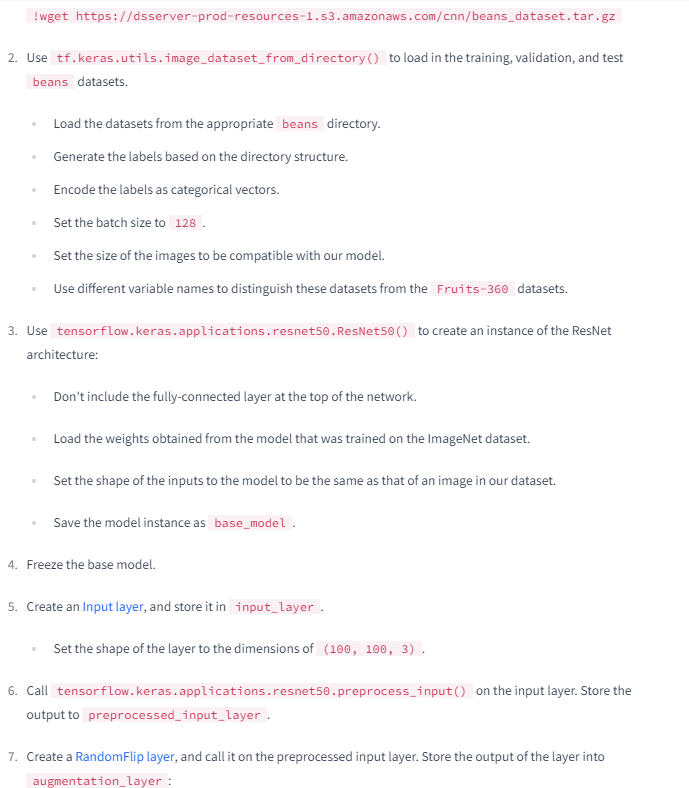

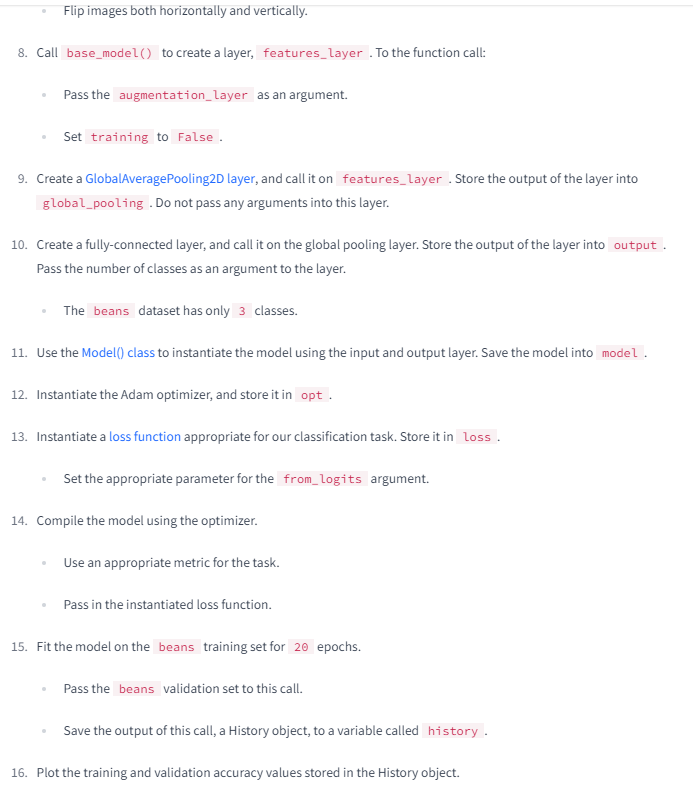

* Our model is doing quite well on the beans dataset. Even with just 20 epochs, it's performing better than our models in the previous lessons. Next, we'll try to fine-tune our model.

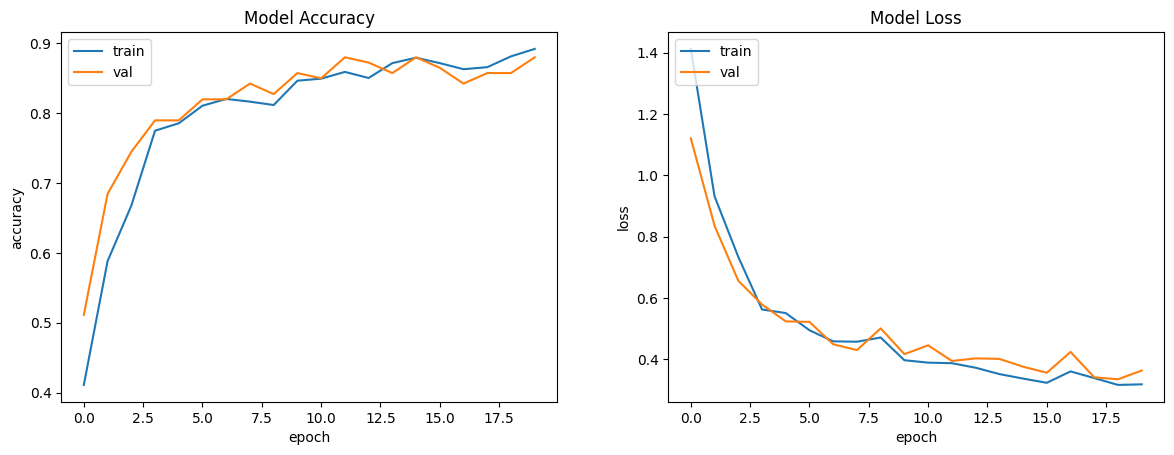

* With the Fruits-360 dataset, we unfroze all the layers of our base model. With a dataset as large as Fruits-360, fine-tuning over all ResNet50 layers is a reasonable choice. However, we don't always need to unfreeze the entire base model.

*  **We can choose to unfreeze only a select few layers and fine-tune our model on just those layers. For a small dataset, it's recommended to unfreeze the last few layers and fine-tune the model on them in order to avoid overfitting**. Depending on the model's performance, we can repeat the process for other layers as well, if needed.

* We'll unfreeze the last residual block of the base model. According to this research paper, the final residual block of the model contains three convolutional layers. Similar to ResNet18, the first two layers in the block are followed by batch normalization and ReLU layers. The third layer is followed by a batch normalization layer. The input to the block is added to the output of the third layer, using an Add layer, and that output is followed by a ReLU layer.

* That's a total of 10 layers in the last block, including the Add layer. In TensorFlow, we can access the layers of a model using the layers attribute. We can then iterate over the layers to freeze or unfreeze any layer:

In [ ]:
for layer in model.layers:
    layer.trainable = True

* If we wanted to access only the last 10 layers of a model, we could slice it like we would a Python list: `model.layers[-10:]`

* In TensorFlow, if we want to unfreeze specific layers, we need to perform the following two steps:

 * Unfreeze the entire model.

 * Freeze all layers except the ones we want unfrozen.

* In our scenario, we'll freeze all layers except the last 10 layers. Unfreezing only the last 10 layers might seem like the more obvious approach. However, TensorFlow does not currently allow that approach, so we have to follow the above two steps.

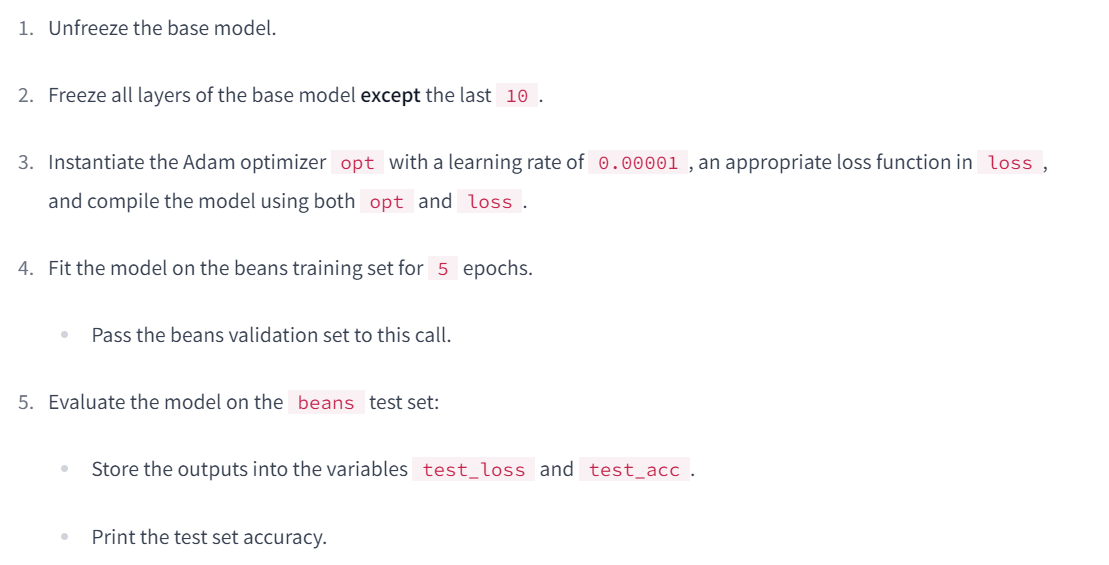

https://github.com/dataquestio/solutions/blob/master/Mission784Solutions.ipynb